# Exploratory Data Analysis<br> 
### by Ori Rosenthal

![covid image](https://cdn3.creativecirclemedia.com/wilsontimes/original/20200315-135549-COVID19%20GRAPHICweb.jpg)
Image from cdn3.creativecirclemedia.com

In [80]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import squarify 
from adjustText import adjust_text
from IPython.display import Image
import datetime
from time import sleep
from geopy.geocoders import Nominatim
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnchoredText
import matplotlib.patheffects as path_effects

%matplotlib inline

import os
os.environ['PROJ_LIB'] = r'C:\Users\User\Anaconda3\envs\data_env\Library\share'
from mpl_toolkits.basemap import Basemap
import folium
pd.options.display.max_rows = 999


In [81]:
def get_lat_lon(location):
    '''
    get longitude and latitude from geolocator api
    '''
    geolocator = Nominatim(user_agent="data_covid")
    location = geolocator.geocode(location)
    return(location.longitude, location.latitude)   


def pair_corr_plot(df, tc_threshold = 10000, x ='MedAg', y='Deaths/Cases'):

    fig, ax = plt.subplots(figsize = (16, 10))
    df_age = df[df['TotalCases']>tc_threshold].reset_index().sort_values(x, ascending=False)
    df_age['Deaths/Cases'] = df_age['TotalDeaths'] / df_age['TotalCases']
    corr = df_age[x].corr(df_age[y]).round(2)
    sns.regplot(x, y, data=df_age, label='Country');
    text = [plt.text(x, y, z, color='r', size=15) for x, y, z in zip(df_age[x],df_age[y],df_age['Country'])]
    plt.title(f'COVID19 - Countries by {x} Vs. {y}',pad=15,weight = 'semibold')
    sns.set(font_scale=1.4);
    props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
    ax.text(0.04, 0.93, f'Correlation: {corr}', transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props);
    adjust_text(text);
    
def countries_tpr_recovery():
    

    fig, ax = plt.subplots(figsize = (20, 14))
    df_ir = df[(df['Tests/ 1M pop'] > 5000) & (df['TotalCases']>5000)].reset_index()
    df_ir['recoverd\cases'] = df_ir['TotalRecovered'] / (df_ir['TotalCases'] - df_ir['TotalDeaths'])
    df_ir['Cases_tests_recoverd_retio'] = df_ir['recoverd\cases'] * df_ir['Cases/Test']
    df_ir = df_ir.sort_values(by='Cases/Test')
    median_ir = df_ir['Cases/Test'].median()
    ax = sns.barplot(x= "Cases/Test", y = "Country", data = df_ir, palette=("OrRd"), label='Test positivity rate (cases/tests)')
    ax2 = sns.barplot(x= "Cases_tests_recoverd_retio", y = "Country", data = df_ir, color='g', label='Current Recovery rate')
    plt.title(f'COVID19 - Confirmed cases (Test positive rate) & Recovery Rate by Countries ({datetime.date.today()})',
              fontsize=20,pad=12,weight ='semibold')
    ax3 = plt.axvline(median_ir, linestyle='--', c='grey', alpha=0.7,
                      label=f'Median positivity rate: {np.round(median_ir*100,2)}%')
    plt.gca().legend(prop={'size': 20})
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    plt.yticks(fontsize=20); plt.xlabel('Test positive rate')
    leg = ax.get_legend()
    leg.legendHandles[1].set_color('brown'); sns.set_context("poster");
    
    
def countries_cases_recovery():
    

    fig, ax = plt.subplots(figsize = (20, 14))
    df_ir = df[df['TotalCases']>10000].reset_index()
    df_ir['recoverd/1M'] = df_ir['TotalRecovered'] / (df_ir['Population (2020)'] /1_000_000)

    # df_ir['Cases_tests_recoverd_retio'] = df_ir['recoverd\cases'] * df_ir['Cases/Test']
    df_ir = df_ir.sort_values(by='Tot Cases_1M')
    ax = sns.barplot(x= "Tot Cases_1M", y = "Country", data = df_ir, palette=("OrRd"), label='Cases per million')
    ax2 = sns.barplot(x= "recoverd/1M", y = "Country", data = df_ir, color='g', label='Recovery per million')
    plt.title(f'COVID19 - Confirmed Cases & Recovery per million by Countries ({datetime.date.today()})',
              fontsize=20,pad=12,weight ='semibold')
    ax3 = plt.axvline(df_ir['Tot Cases_1M'].median(), linestyle='--', c='r', alpha=0.8,
                      label=f'Median cases per million: {df_ir["Tot Cases_1M"].median():,}')
    ax4 = plt.axvline(df_ir['recoverd/1M'].median(), linestyle='--', c='g', alpha=0.8,
                      label=f'Median recovery per million: {np.round(df_ir["recoverd/1M"].median())}')
    plt.gca().legend(prop={'size': 20})
    # ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    plt.yticks(fontsize=20); plt.xlabel('Cases per Million')
    leg = ax.get_legend()
    leg.legendHandles[2].set_color('brown'); sns.set_context("poster");
    
    
    
def countries_tpr_tr():
    
    
    fig, ax = plt.subplots(figsize = (15, 10))
    df_ir = df[df['TotalCases']>10000].reset_index()
    df_ir = df_ir.sort_values(by='Tests/ 1M pop')
    ax = sns.barplot(x= "Country" , y = "Tests/ 1M pop", data = df_ir, color='g', label='Test per million')
    plt.xticks(rotation=70, fontsize=15); 
    plt.yticks(color='blue', size=20)
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x= "Country", y = "Cases/Test", data = df_ir, color='r', label='Tests positivity rate')
    ax.yaxis.set_ticks_position("right")
    ax2.yaxis.set_ticks_position("left")
    ax.set_ylabel('Test Poitive Rate (%)', fontsize=16, color='red', size=20,labelpad=35)
    ax2.set_ylabel('Tests per Million', fontsize=16, color='green', size=20, rotation=270, labelpad=60)
    ax.set_ylabel('Test Poitive Rate (%)', fontsize=16, color='red', size=20,labelpad=50)
    ax2.set_ylabel('Tests per Million', fontsize=16, color='green', size=20, rotation=270, labelpad=60)
    plt.title(f'COVID19 - Test positive rate Vs Test per million',fontsize=25,pad=12,weight ='semibold');
    ax.tick_params(axis='y', color='r', labelsize=10)
    plt.yticks(color='red', size=15);ax2.grid(False);
    

def worst_countries():

    
    worst_countries = df[df['Population (2020)']>1_000_000].sort_values('Deaths/1M pop',ascending=False)
    worst_countries = worst_countries.head(round(0.1 * len(worst_countries)))

    median_cases = worst_countries['Tot Cases_1M'].median()
    median_deaths = worst_countries['Deaths/1M pop'].median()
    fig, ax = plt.subplots(figsize=(16,9), dpi= 80)
    sns.scatterplot(x='Tot Cases_1M', y='Deaths/1M pop', data=worst_countries, s=40, color='darkblue');
    text = [plt.text(x, y, z, color='darkblue', size=20,path_effects=[path_effects.withSimplePatchShadow()]) \
            for x, y, z in zip(worst_countries['Tot Cases_1M'], worst_countries['Deaths/1M pop'],worst_countries.index)]
    plt.title(f'COVID19 - Worst hit countries Cases Vs. Deaths per 1M \n(top 10% countries with the highest death'\
              'rate per million)', color='dimgray', pad=15,fontsize=17, weight = 'semibold')
    ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    plt.margins(x=0,y=0)
    ax.patch.set_facecolor('red');ax.patch.set_alpha(0.6);
    ax.grid(False)
    sns.set(font_scale = 1.5);
    ax.tick_params( colors='dimgray')
    adjust_text(text);
    
    
def us_positive_t20():
    

    fig, ax = plt.subplots(figsize = (18, 14))
    ax = sns.barplot(x="positive",y="state",data=usa_covid19.groupby('state')[['positive']].first()\
            .sort_values(by='positive').reset_index()[-20:],palette=("OrRd"), label='Current Cases'); 
    ax2 = sns.barplot(x="positive",y="state",data=usa_covid19lw.groupby('state')[['positive']].first()\
            .sort_values(by='positive').reset_index()[-20:],palette=("GnBu"), label='7 Days ago'); 
    plt.yticks(fontsize=20); plt.xticks(fontsize=20);
    ax.set_xlabel("Positive Cases",fontsize=20, color='gray', weight ='semibold')
    ax.set_ylabel("States",fontsize=20, color='gray',weight ='semibold')
    plt.title(f'COVID19 - US - Top 20 Most Infected States (last update: {usa_covid19.date[0].date()})',
          fontsize=20, weight ='semibold');
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
    plt.gca().legend(prop={'size': 20}); leg = ax.get_legend()
    leg.legendHandles[0].set_color('brown');leg.legendHandles[1].set_color('royalblue'); sns.set_context("poster");




def test_positive_rate_plot(df, state):
    
    
    results = df[df['state'] == state][['date','positiveIncrease','totalTestResultsIncrease']]\
                 .sort_values(by='date').reset_index(drop=True).dropna() 
    results['test positive rate'] = results['positiveIncrease'] / results['totalTestResultsIncrease']
    results['test positive rate'].dropna(inplace=True)
    results = results[results['date'] > '2020-03-17']
    results['MA'] = results['test positive rate'].expanding(2).mean().shift(1)
    plt.style.use('seaborn-paper')
    fig, ax = plt.subplots(figsize=(10,6))
    ax.grid(False)
    plt.plot(results['date'], results['test positive rate'], marker='.', markersize=15, lw=3);
    plt.plot(results['date'], results['MA'], color='r', lw=3.5);
    plt.xticks(fontsize=15,rotation=45);
    plt.yticks(size=15)
    plt.xlim(results['date'].min().date(),results['date'].max().date()+ datetime.timedelta(2))
    plt.title(f'COVID19 - Test Positive Rate in {state}', fontsize=20,pad=15,weight ='semibold')
    ax.set_ylabel('Daily test Positive Ratio', fontsize=16, size=20)
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    plt.text(results['date'].max().date() -datetime.timedelta(1),(results['test positive rate'].iloc[-1])*1.1,\
         f"{(results['test positive rate'].iloc[-1]*100).round(1)}%", color='blue', size=15)
    plt.text(results['date'].max().date()-datetime.timedelta(1),(results['MA'].iloc[-1])*1.1,\
         f"{(results['MA'].iloc[-1]*100).round(1)}%", color='red', size=15)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.legend(['test positive ratio','expanding mean'],prop={'size': 15}, loc='best');

    
    
def positive_cases_plot(df,state):
    
    state_c = df[df['state'] ==state][['date','positiveIncrease','deathIncrease']].sort_values(by='date')\
    .reset_index(drop=True).dropna()
    state_c['total_cases'] = state_c['positiveIncrease'].cumsum()
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize=(16,5))
    plt.bar(state_c['date'], height=state_c['positiveIncrease'], width=0.9,alpha=0.9);
    plt.xlim(state_c['date'].min().date(),state_c['date'].max().date() + datetime.timedelta(2))
    plt.xticks(fontsize=17,rotation=45);
    plt.yticks(color='blue', size=20)
    plt.margins(x=0.04)
    plt.title(f'COVID19 - Cases in {state}', fontsize=25,pad=15,weight ='semibold')
    ax.set_ylabel('Daily Positive Increase', fontsize=16, color='blue', size=20,rotation=360)
    ax.yaxis.set_label_coords(-0.05,1.04)
    ax.grid(False)
    ax2 = ax.twinx()
    plt.plot(state_c['date'],state_c['total_cases'], lw=3.5, color='r', marker='.', markersize=20)
    plt.yticks(color='red', size=20); ax2.grid(False)
    ax2.set_ylabel('Total Positive Cases', fontsize=16, color='red', size=20, rotation=360, labelpad=35)
    ax2.yaxis.set_label_coords(+1.05,1.1)
    at = AnchoredText(f"Total Positive Cases: {int(state_c['total_cases'].iloc[-1]):,}",
                  prop=dict(size=15, color='r',fontweight="bold"), frameon=True, loc='upper left',)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))    
    
    
def test_positive_rate_plot(df, state):
    
    
    plt.style.use('seaborn-bright')
    results = df[df['state'] == state][['date','positiveIncrease','totalTestResultsIncrease']]\
                 .sort_values(by='date').reset_index(drop=True).dropna() 
    results['test positive rate'] = results['positiveIncrease'] / results['totalTestResultsIncrease']
    results['test positive rate'].dropna(inplace=True)
    results = results[results['date'] > '2020-03-17']
    results['MA'] = results['test positive rate'].expanding(2).mean().shift(1)
    plt.style.use('seaborn-paper')
    fig, ax = plt.subplots(figsize=(10,5))
    ax.grid(False)
    plt.plot(results['date'], results['test positive rate'], marker='.', markersize=15, lw=2);
    plt.plot(results['date'], results['MA'], color='r', lw=3);
    plt.xticks(fontsize=10,rotation=45);
    plt.yticks(size=12)
    plt.xlim(results['date'].min().date(),results['date'].max().date()+ datetime.timedelta(2))
    plt.title(f'COVID19 - Test Positive Rate in {state}', fontsize=20,pad=15,weight ='semibold')
    ax.set_ylabel('Daily test Positive Ratio', fontsize=16, size=15)
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    plt.text(results['date'].max().date() -datetime.timedelta(1),(results['test positive rate'].iloc[-1])*1.1,\
         f"{(results['test positive rate'].iloc[-1]*100).round(1)}%", color='blue', size=15)
    plt.text(results['date'].max().date()-datetime.timedelta(1),(results['MA'].iloc[-1])*1.1,\
         f"{(results['MA'].iloc[-1]*100).round(1)}%", color='red', size=15)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.legend(['test positive ratio','expanding mean'],prop={'size': 15}, loc='best');



def positive_cases_plot(df,state):
    
    
    plt.style.use('seaborn-deep')
    state_c = df[df['state'] ==state][['date','positiveIncrease','deathIncrease']].sort_values(by='date')\
    .reset_index(drop=True).dropna()
    state_c['total_cases'] = state_c['positiveIncrease'].cumsum()
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize=(16,5))
    plt.bar(state_c['date'], height=state_c['positiveIncrease'], width=0.9,alpha=0.9);
    plt.xlim(state_c['date'].min().date(),state_c['date'].max().date() + datetime.timedelta(2))
    plt.xticks(fontsize=17,rotation=45);
    plt.yticks(color='blue', size=20)
    plt.margins(x=0.04)
    plt.title(f'COVID19 - Cases in {state}', fontsize=25,pad=15,weight ='semibold')
    ax.set_ylabel('Daily Positive Increase', fontsize=16, color='blue', size=20,rotation=360)
    ax.yaxis.set_label_coords(-0.05,1.04)
    ax.grid(False)
    

    ax2 = ax.twinx()
    plt.plot(state_c['date'],state_c['total_cases'], lw=3.5, color='r', marker='.', markersize=20)
    plt.yticks(color='red', size=20); ax2.grid(False)
    ax2.set_ylabel('Total Positive Cases', fontsize=16, color='red', size=20, rotation=360, labelpad=35)
    ax2.yaxis.set_label_coords(+1.05,1.1)
    at = AnchoredText(f"Total Positive Cases: {int(state_c['total_cases'].iloc[-1]):,}",
                  prop=dict(size=15, color='r',fontweight="bold"), frameon=True, loc='upper left',)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    
    
def top_20_infected():
    

    fig, ax = plt.subplots(figsize = (18, 14))
    ax = sns.barplot(x="positive",y="state",data=usa_covid19.groupby('state')[['positive']].first()\
                .sort_values(by='positive').reset_index()[-20:],palette=("OrRd"), label='Current Cases'); 
    ax2 = sns.barplot(x="positive",y="state",data=usa_covid19lw.groupby('state')[['positive']].first()\
                .sort_values(by='positive').reset_index()[-20:],palette=("GnBu"), label='7 Days ago'); 
    plt.yticks(fontsize=20); plt.xticks(fontsize=20);
    ax.set_xlabel("Positive Cases",fontsize=20, color='gray', weight ='semibold')
    ax.set_ylabel("States",fontsize=20, color='gray',weight ='semibold')
    plt.title(f'COVID19 - US - Top 20 Infected States (last update: {usa_covid19.date[0].date()})',fontsize=20,
              weight ='semibold');
    text = [plt.text(y+2000, x, "{:,}".format(int(y)),color='black', size=17,
                     path_effects=[path_effects.withSimplePatchShadow()]) for x, y in enumerate(usa_top20['positive'])]
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
    plt.xlim(0, usa_top20['positive'].max()*1.1);plt.gca().legend(prop={'size': 20}); leg = ax.get_legend()
    leg.legendHandles[0].set_color('brown');leg.legendHandles[1].set_color('royalblue'); sns.set_context("poster");


In [82]:
import requests

url = 'https://www.worldometers.info/coronavirus/#countries'
url2 = 'https://www.worldometers.info/world-population/population-by-country/'
url3 = 'https://github.com/COVID19Tracking/covid-tracking-data/raw/master/data/states_daily_4pm_et.csv'
url4 = 'https://en.wikipedia.org/wiki/OECD'
r1 = requests.get(url)
r2 = requests.get(url2)

a = pd.read_html(r1.text)[0]
b = pd.read_html(r2.text)[0]
usa_covid19 = pd.read_csv(url3, parse_dates=['date'])
oecd_countries = pd.read_html(url4)[5]['Country'].to_list()

In [83]:
# Main data table from www.worldometers
a.head()

Country,Other  TotalCases NewCases  TotalDeaths NewDeaths  TotalRecovered  \
0         World     4174533  +76,254     283595.0    +3,371       1469007.0   
1           USA     1365352  +18,043      80718.0      +681        240860.0   
2         Spain      264663   +1,880      26621.0      +143        176439.0   
3            UK      219183   +3,923      31855.0      +268             NaN   
4         Italy      219070     +802      30560.0      +165        105186.0   

   ActiveCases  Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0      2421931           47016.0             536.0           36.4         NaN   
1      1043774           16493.0            4125.0          244.0   9378136.0   
2        61603            1650.0            5661.0          569.0   2467761.0   
3       186984            1559.0            3229.0          469.0   1821280.0   
4        83324            1027.0            3623.0          505.0   2565912.0   

   Tests/ 1M pop  
0            NaN  
1        28333.0  
2        52781.0  
3        26829.0  
4        42439.0

In [84]:
# Secondary table from www.worldometers with features on each country
b.head()

# Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0  1                   China         1439323776        0.39 %     5540090   
1  2                   India         1380004385        0.99 %    13586631   
2  3           United States          331002651        0.59 %     1937734   
3  4               Indonesia          273523615        1.07 %     2898047   
4  5                Pakistan          220892340        2.00 %     4327022   

   Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0              153          9388211       -348399.0        1.7       38   
1              464          2973190       -532687.0        2.2       28   
2               36          9147420        954806.0        1.8       38   
3              151          1811570        -98955.0        2.3       30   
4              287           770880       -233379.0        3.6       23   

  Urban Pop % World Share  
0        61 %     18.47 %  
1        35 %     17.70 %  
2        83 %      4.25 %  
3        56 %      3.51 %  
4        35 %      2.83 %

In [85]:
len(a), len(b)

(216, 235)

In [86]:
[i for i in a['Country,Other'] if i not in b['Country (or dependency)'].values]

['World',
 'USA',
 'UK',
 'UAE',
 'S. Korea',
 'Czechia',
 'Ivory Coast',
 'DRC',
 'Diamond Princess',
 'Palestine',
 'Sao Tome and Principe',
 'CAR',
 'St. Vincent Grenadines',
 'Saint Kitts and Nevis',
 'Vatican City',
 'MS Zaandam',
 'St. Barth',
 'Saint Pierre Miquelon',
 'Total:']

In [87]:
pd.DataFrame([[i for i in a['Country,Other'] if i not in b['Country (or dependency)'].values],
              [j for j in b['Country (or dependency)'] if j not in a['Country,Other'].values]]).T

0                         1
0                    World             United States
1                      USA                  DR Congo
2                       UK            United Kingdom
3                      UAE               South Korea
4                 S. Korea             Côte d'Ivoire
5                  Czechia               North Korea
6              Ivory Coast  Czech Republic (Czechia)
7                      DRC      United Arab Emirates
8         Diamond Princess              Turkmenistan
9                Palestine        State of Palestine
10   Sao Tome and Principe  Central African Republic
11                     CAR               Puerto Rico
12  St. Vincent Grenadines                   Lesotho
13   Saint Kitts and Nevis           Solomon Islands
14            Vatican City                   Vanuatu
15              MS Zaandam       Sao Tome & Principe
16               St. Barth                     Samoa
17   Saint Pierre Miquelon                      Guam
18                  Total:                  Kiribati
19                    None                Micronesia
20                    None  St. Vincent & Grenadines
21                    None                     Tonga
22                    None       U.S. Virgin Islands
23                    None          Marshall Islands
24                    None  Northern Mariana Islands
25                    None            American Samoa
26                    None       Saint Kitts & Nevis
27                    None                     Palau
28                    None              Cook Islands
29                    None                    Tuvalu
30                    None           Wallis & Futuna
31                    None                     Nauru
32                    None          Saint Barthelemy
33                    None              Saint Helena
34                    None   Saint Pierre & Miquelon
35                    None                      Niue
36                    None                   Tokelau
37                    None                  Holy See

In [88]:
# Fix columns name
a.rename(columns={'Country,Other':'Country',
                  "Tot Cases/1M pop":"Tot Cases_1M pop",
                  "Tot Deaths/1M pop":"Tot Deaths_1M pop",
                  "Serious,Critical":"Serious",
                  "Tot\xa0Cases/1M pop":"Tot Cases_1M"}, inplace=True)

b.rename(columns={'Country (or dependency)':'Country', 'Med. Age':'MedAg'}, inplace=True)

# Replace (from DataFrame above) country names with a dictionary before joining together 
b.Country.replace({'United Arab Emirates':'UAE', "Côte d'Ivoire": 'Ivory Coast', 'Congo':'DRC',
                   'State of Palestine':'Palestine','Central African Republic':'CAR',
                   'Sao Tome & Principe':'Sao Tome and Principe','St. Vincent & Grenadines':'St. Vincent Grenadines',
                   'Saint Kitts & Nevis':'Saint Kitts and Nevis','Saint Barthelemy':'St. Barth',
                   'Saint Pierre & Miquelon': 'Saint Pierre Miquelon', 'Czech Republic (Czechia)':'Czech Republic',
                  }, inplace= True)
a.Country.replace({'USA':'United States','UK':'United Kingdom', 'S. Korea':'South Korea', 'Czechia':'Czech Republic'},
                 inplace=True)
# 'Diamond Princess' and 'MS Zaandam' are cruise ships, Vatican City wasnt found on DataSet b,
# They will be removed from the df merge later, with 'world' (which is an aggregation row), 
# and also China due to the circulation of false Chinese data

In [89]:
# merge a and b to one data set
df = a.merge(b)

In [90]:
df.head()

Country  TotalCases NewCases  TotalDeaths NewDeaths  TotalRecovered  \
0   United States     1365352  +18,043      80718.0      +681        240860.0   
1           Spain      264663   +1,880      26621.0      +143        176439.0   
2  United Kingdom      219183   +3,923      31855.0      +268             NaN   
3           Italy      219070     +802      30560.0      +165        105186.0   
4          Russia      209688  +11,012       1915.0       +88         34306.0   

   ActiveCases  Serious  Tot Cases_1M  Deaths/1M pop  ...  Population (2020)  \
0      1043774  16493.0        4125.0          244.0  ...          331002651   
1        61603   1650.0        5661.0          569.0  ...           46754778   
2       186984   1559.0        3229.0          469.0  ...           67886011   
3        83324   1027.0        3623.0          505.0  ...           60461826   
4       173467   2300.0        1437.0           13.0  ...          145934462   

   Yearly Change  Net Change  Density (P/Km²) Land Area (Km²)  Migrants (net)  \
0         0.59 %     1937734               36         9147420        954806.0   
1         0.04 %       18002               94          498800         40000.0   
2         0.53 %      355839              281          241930        260650.0   
3        -0.15 %      -88249              206          294140        148943.0   
4         0.04 %       62206                9        16376870        182456.0   

   Fert. Rate  MedAg  Urban Pop % World Share  
0         1.8     38         83 %      4.25 %  
1         1.3     45         80 %      0.60 %  
2         1.8     40         83 %      0.87 %  
3         1.3     47         69 %      0.78 %  
4         1.8     40         74 %      1.87 %  

[5 rows x 23 columns]

In [91]:
df.drop(['#','Yearly Change','NewDeaths','Migrants (net)','Land Area (Km²)','World Share','Net Change','Land Area (Km²)'],
        axis=1, inplace=True) # Drop columns

In [92]:
df = df.set_index('Country')

In [93]:
# Change data types
df['Urban Pop %'] = df['Urban Pop %'].str.replace("%","").replace("N.A.",np.nan).astype('float')
df['Density (P/Km²)'] = df['Density (P/Km²)'].astype('int64')
df['Fert. Rate'] = df['Fert. Rate'].replace("N.A.",np.nan).astype('float')
df['NewCases'] = df['NewCases'].str[1:].str.replace(",","").fillna(0).astype(float)
df['MedAg'] = df['MedAg'].str.replace("N.A.",'0').astype('int64')
df.fillna(0, inplace=True)

# Drop China due to the circulation of false Chinese data
df.drop(index='China', inplace=True)

# Let's build two new columns that show the ratio of tests-cases-recovery-deaths.
df['Cases/Test'] = df['TotalCases'] / df['TotalTests']
df['Deaths/Cases'] = df['TotalDeaths'] / df['TotalCases']
df['Recovered/Cases'] = df['TotalRecovered'] / df['TotalCases']

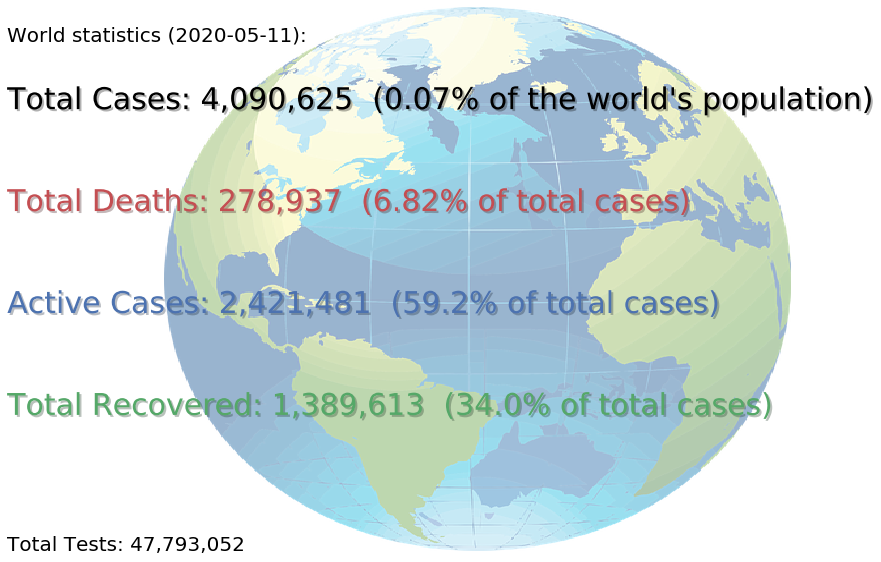

In [94]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
im = plt.imread('https://i.pinimg.com/originals/2e/16/38/2e1638b1ceacd2474452dad58ad2227b.png')
plt.imshow(im, extent=[0.2,1,0.2,1], zorder=0, aspect='auto', alpha=0.4)
plt.text(0, 0.95,f'World statistics ({datetime.date.today()}):', fontsize=20)
plt.text(0, 0.85,f'Total Cases: {df["TotalCases"].sum():,}  '\
         f'({round(df["TotalCases"].sum()/df["Population (2020)"].sum()*100,2)}% of the world\'s population)',
         color='black', fontsize=30,path_effects=[path_effects.withSimplePatchShadow()]);
plt.text(0, 0.7,f'Total Deaths: {int(df["TotalDeaths"].sum()):,}  '\
         f'({round(df["TotalDeaths"].sum()/df["TotalCases"].sum()*100,2)}% of total cases)',color='r', fontsize=30,
        path_effects=[path_effects.withSimplePatchShadow()]);
plt.text(0, 0.55,f'Active Cases: {df["ActiveCases"].sum():,}  '\
         f'({round(df["ActiveCases"].sum()/df["TotalCases"].sum()*100,1)}% of total cases)',color='b', fontsize=30,
        path_effects=[path_effects.withSimplePatchShadow()]);
plt.text(0, 0.4,f'Total Recovered: {int(df["TotalRecovered"].sum()):,}  '\
         f'({round(df["TotalRecovered"].sum()/df["TotalCases"].sum()*100,1)}% of total cases)',color='g', fontsize=30,
        path_effects=[path_effects.withSimplePatchShadow()]);
plt.text(0, 0.2,f'Total Tests: {int(df["TotalTests"].sum()):,}',color='black', fontsize=20);
plt.axis('off');

In [95]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)
with open('world-countries.json') as f:
    world_geo = json.load(f)

countries_dict =({'United States' : 'United States of America', 'UAE': 'United Arab Emirates',
                 'Palestine':'West Bank'})

data = np.log2(df[['Tot Cases_1M']]).reset_index()
data.Country.replace(countries_dict, inplace=True)

choropleth = folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=data,
    columns=['Country', 'Tot Cases_1M'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.9,
    line_opacity=0.2,
    nan_fill_color='#fef0d9',
    nan_fill_opacity=0.2,
    legend_name='Tot Cases_1M',
    highlight=True,
    line_color='black'
).add_to(world_map)

style_function = "font-size: 15px; font-weight: bold"


world_map

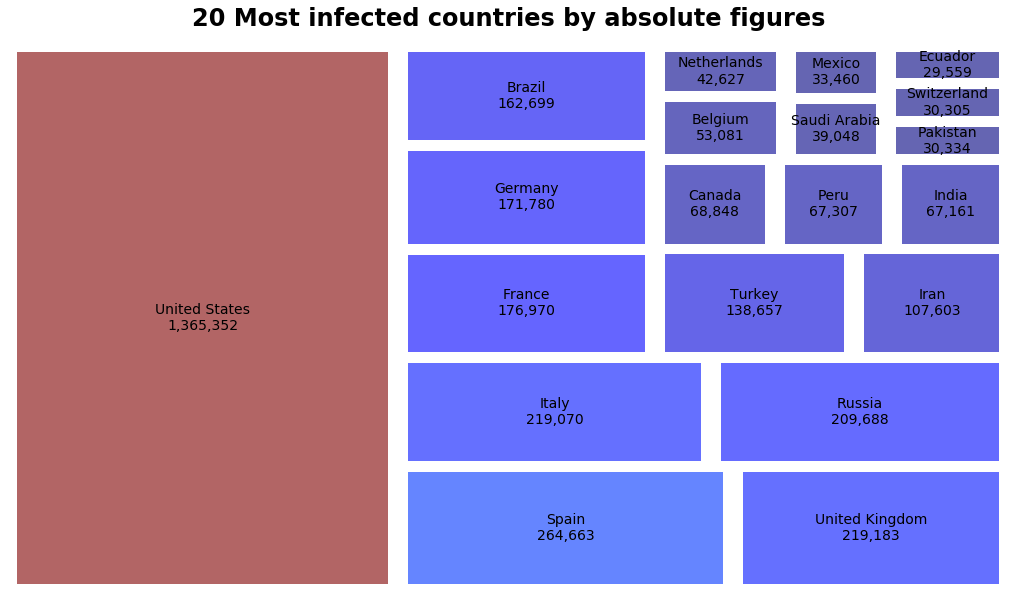

In [96]:
worst_countries_cases = df[['TotalCases']].sort_values(by='TotalCases',ascending=False).head(20)
worst_countries_cases['Label'] = worst_countries_cases.index + "\n" + worst_countries_cases['TotalCases']\
.apply(lambda x : "{:,}".format(x))

# worst_countries_cases = df[['TotalCases']].sort_values(by='TotalCases',ascending=False).head(int(0.1*len(df)))
plt.figure(figsize=(16,10))
plt.axis('off')
mini = min(worst_countries_cases['TotalCases'])
maxi = max(worst_countries_cases['TotalCases'])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
cmap = matplotlib.cm.jet
colors = [cmap(norm(value)) for value in worst_countries_cases['TotalCases']]
squarify.plot(worst_countries_cases['TotalCases'], label=worst_countries_cases['Label'],color=colors, alpha=0.6,pad=True,
              text_kwargs={'fontsize':14});
plt.title('20 Most infected countries by absolute figures', pad=20,fontweight="bold");


In [97]:
print(f"** Those 20 Most infected countries accounts for "\
      f"{round(worst_countries_cases['TotalCases'].sum()/df['TotalCases'].sum()*100,1)}% of cases worldwide.")

** Those 20 Most infected countries accounts for 85.5% of cases worldwide.


Now, Let's look at the number of deaths divided by the number of confirmed cases


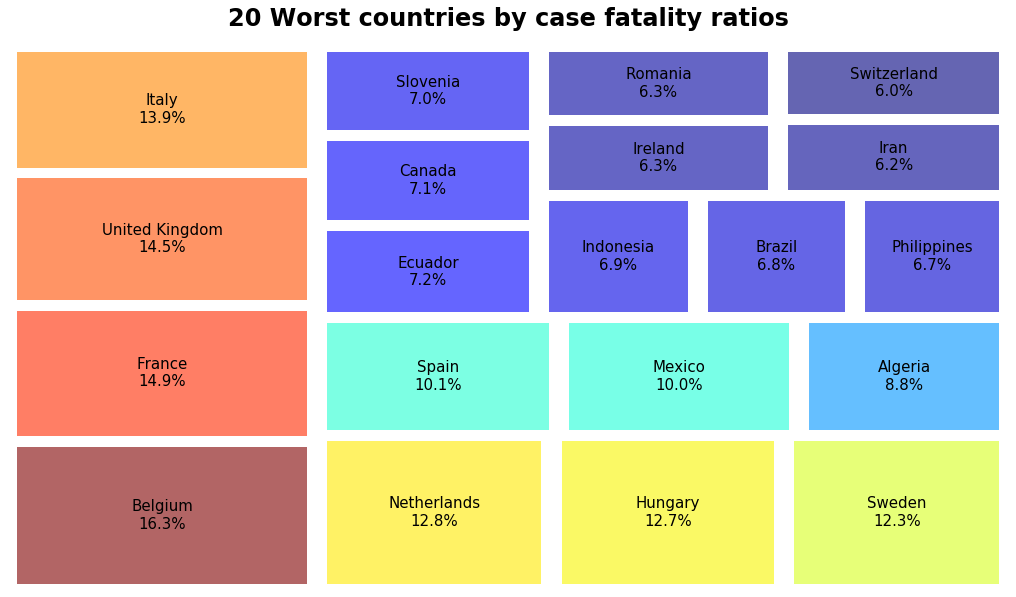

In [98]:
worst_mortality_rate = df[df['TotalCases'] > 1000][['Deaths/Cases']].sort_values(by='Deaths/Cases',
                       ascending=False).head(20).round(3)
worst_mortality_rate['Label'] = worst_mortality_rate.index + "\n" + worst_mortality_rate['Deaths/Cases']\
.apply(lambda x : "{:.1%}".format(x))
# worst_countries_cases = df[['TotalCases']].sort_values(by='TotalCases',ascending=False).head(int(0.1*len(df)))
plt.figure(figsize=(16,10))
plt.axis('off')
mini = min(worst_mortality_rate['Deaths/Cases'])
maxi = max(worst_mortality_rate['Deaths/Cases'])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
cmap = matplotlib.cm.jet
colors = [cmap(norm(value)) for value in worst_mortality_rate['Deaths/Cases']]
squarify.plot(worst_mortality_rate['Deaths/Cases'], label=worst_mortality_rate['Label'],color=colors, alpha=0.6,pad=True,
              text_kwargs={'fontsize':15});
plt.title('20 Worst countries by case fatality ratios', pad=20,fontweight="bold");
print("Now, Let's look at the number of deaths divided by the number of confirmed cases")

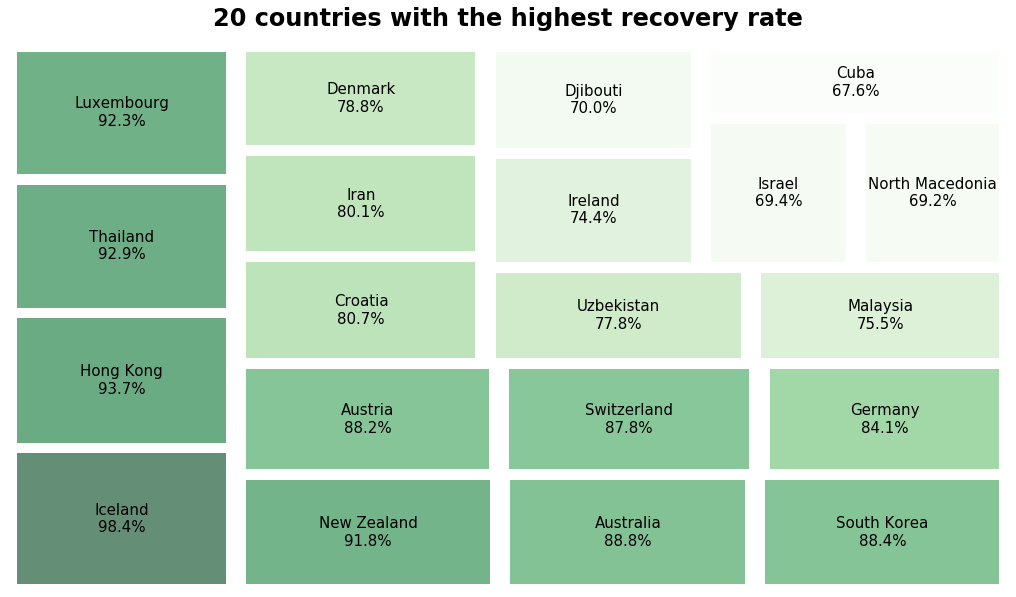

In [99]:
recovery_rate = df[df['TotalCases'] > 1000][['Recovered/Cases']].sort_values(by='Recovered/Cases',
                ascending=False).head(20).round(3)
recovery_rate['Label'] = recovery_rate.index + "\n" + recovery_rate['Recovered/Cases']\
.apply(lambda x : "{:.1%}".format(x))
# worst_countries_cases = df[['TotalCases']].sort_values(by='TotalCases',ascending=False).head(int(0.1*len(df)))
plt.figure(figsize=(16,10))
plt.axis('off')
mini = min(recovery_rate['Recovered/Cases'])
maxi = max(recovery_rate['Recovered/Cases'])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
cmap = matplotlib.cm.Greens
colors = [cmap(norm(value)) for value in recovery_rate['Recovered/Cases']]
squarify.plot(recovery_rate['Recovered/Cases'], label=recovery_rate['Label'],color=colors, alpha=0.6,pad=True,
              text_kwargs={'fontsize':15});
plt.title('20 countries with the highest recovery rate', pad=20,fontweight="bold");


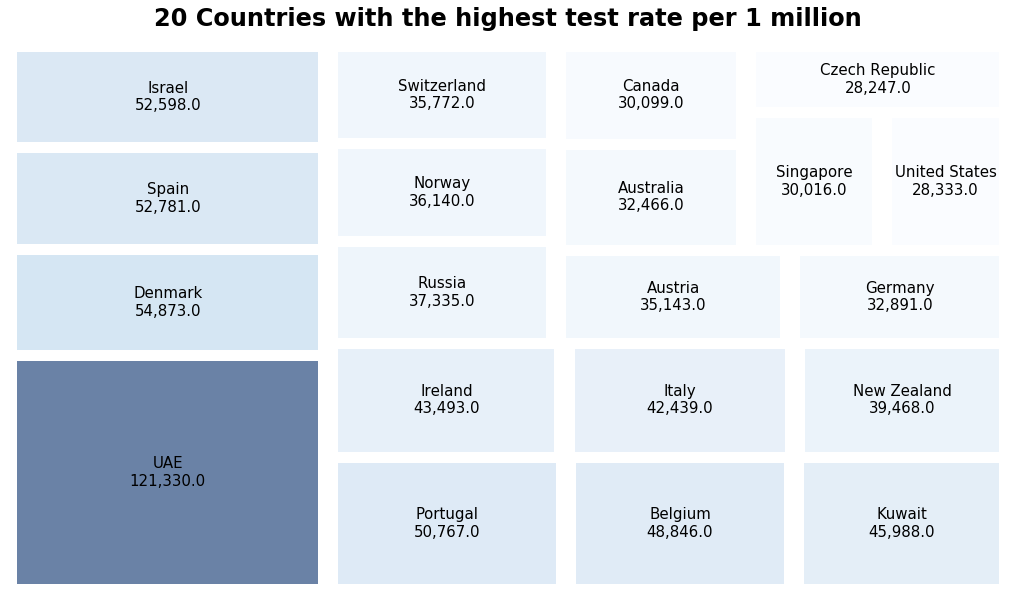

In [100]:
tested_rate = df[(df['TotalCases'] > 100) & (df['Population (2020)']>4_000_000)][['Tests/ 1M pop']]\
              .sort_values(by='Tests/ 1M pop', ascending=False).head(20).round(3)
tested_rate['Label'] = tested_rate.index + "\n" + tested_rate['Tests/ 1M pop']\
                       .apply(lambda x : "{:,}".format(x))
# worst_countries_cases = df[['TotalCases']].sort_values(by='TotalCases',ascending=False).head(int(0.1*len(df)))
plt.figure(figsize=(16,10))
plt.axis('off')
mini = min(tested_rate['Tests/ 1M pop'])
maxi = max(tested_rate['Tests/ 1M pop'])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
cmap = matplotlib.cm.Blues
colors = [cmap(norm(value)) for value in tested_rate['Tests/ 1M pop']]
squarify.plot(tested_rate['Tests/ 1M pop'], label=tested_rate['Label'],color=colors, alpha=0.6,pad=True,
              text_kwargs={'fontsize':15});
plt.title('20 Countries with the highest test rate per 1 million',fontweight="bold", pad=20);

In [101]:
# Let's see the data type, columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, United States to Saint Pierre Miquelon
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TotalCases         209 non-null    int64  
 1   NewCases           209 non-null    float64
 2   TotalDeaths        209 non-null    float64
 3   TotalRecovered     209 non-null    float64
 4   ActiveCases        209 non-null    int64  
 5   Serious            209 non-null    float64
 6   Tot Cases_1M       209 non-null    float64
 7   Deaths/1M pop      209 non-null    float64
 8   TotalTests         209 non-null    float64
 9   Tests/ 1M pop      209 non-null    float64
 10  Population (2020)  209 non-null    int64  
 11  Density (P/Km²)    209 non-null    int64  
 12  Fert. Rate         209 non-null    float64
 13  MedAg              209 non-null    int64  
 14  Urban Pop %        209 non-null    float64
 15  Cases/Test         209 non-null    float64
 16  D

In [102]:
# Look at the main statistics of the numeric columns
df.describe().T.round(1)

count        mean          std     min       25%  \
TotalCases         209.0     19572.4     101534.8     1.0     104.0   
NewCases           209.0       364.8       1602.0     0.0       0.0   
TotalDeaths        209.0      1334.6       6904.5     0.0       2.0   
TotalRecovered     209.0      6648.9      26030.2     0.0      31.0   
ActiveCases        209.0     11586.0      74977.0     0.0      26.0   
Serious            209.0       224.9       1321.5     0.0       0.0   
Tot Cases_1M       209.0       946.6       1895.7     0.9      45.0   
Deaths/1M pop      209.0        46.7        134.6     0.0       0.4   
TotalTests         209.0    228674.9     834437.4     0.0    1188.0   
Tests/ 1M pop      209.0     15911.5      27286.8     0.0     577.0   
Population (2020)  209.0  29794465.6  104374650.6  3480.0  869601.0   
Density (P/Km²)    209.0       506.2       2467.4     0.0      35.0   
Fert. Rate         209.0         2.4          1.4     0.0       1.5   
MedAg              209.0        27.6         12.8     0.0      19.0   
Urban Pop %        209.0        57.8         25.9     0.0      39.0   
Cases/Test         209.0         inf          NaN     0.0       0.0   
Deaths/Cases       209.0         0.0          0.0     0.0       0.0   
Recovered/Cases    209.0         0.5          0.3     0.0       0.3   

                         50%         75%           max  
TotalCases             755.0      5962.0  1.365352e+06  
NewCases                 6.0        88.0  1.804300e+04  
TotalDeaths             16.0       128.0  8.071800e+04  
TotalRecovered         271.0      1958.0  2.408600e+05  
ActiveCases            315.0      2543.0  1.043774e+06  
Serious                  2.0        23.0  1.649300e+04  
Tot Cases_1M           209.0      1122.0  1.850800e+04  
Deaths/1M pop            4.0        26.0  1.208000e+03  
TotalTests           17170.0    144912.0  9.378136e+06  
Tests/ 1M pop         4034.0     19076.0  1.729320e+05  
Population (2020)  6871292.0  24206644.0  1.380004e+09  
Density (P/Km²)         94.0       238.0  2.633700e+04  
Fert. Rate               2.1         3.0  7.000000e+00  
MedAg                   29.0        38.0  4.800000e+01  
Urban Pop %             59.0        79.0  1.000000e+02  
Cases/Test               0.1         0.2           inf  
Deaths/Cases             0.0         0.1  3.000000e-01  
Recovered/Cases          0.5         0.8  1.000000e+00

count        209.0
mean       19572.0
std       101535.0
min            1.0
25%          104.0
50%          755.0
75%         5962.0
max      1365352.0
Name: TotalCases, dtype: float64


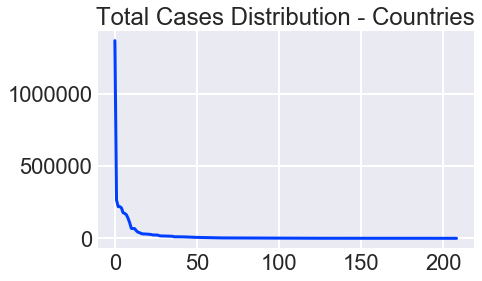

In [103]:
# We can see that most of the data comes from a small number of countries.
plt.style.use('seaborn-darkgrid')
print(df['TotalCases'].describe().round())
df.reset_index()['TotalCases'].plot(title='Total Cases Distribution - Countries');

In [104]:
df['World%TotalCases'] = np.round(df['TotalCases'] / df['TotalCases'].sum() *100,2)
print(f'Worldwide Coronavirus Cases: {df.TotalCases.sum()}')
df.sort_values(by='TotalCases', ascending=False)[[ 'TotalCases','World%TotalCases']].head(5)

Worldwide Coronavirus Cases: 4090625


TotalCases  World%TotalCases
Country                                     
United States      1365352             33.38
Spain               264663              6.47
United Kingdom      219183              5.36
Italy               219070              5.36
Russia              209688              5.13

### As we can see, five countries have almost 60% of all cases worldwide.

We will drop countries with less than 100 positive cases as they are less relevant to our overall statistics.

## Global spread of COVID-19 
#### (Countries with a population of over 1,000,000)

In [105]:
worst_c = df[df['Population (2020)']>1_000_000].sort_values('Deaths/1M pop',ascending=False)
worst_c = worst_c[['Tot Cases_1M', 'Deaths/1M pop']].head(round(0.1 * len(worst_c)))
worst_c.style.format("{:,.0f}").background_gradient(cmap='Reds').set_caption('Worst hit countries')

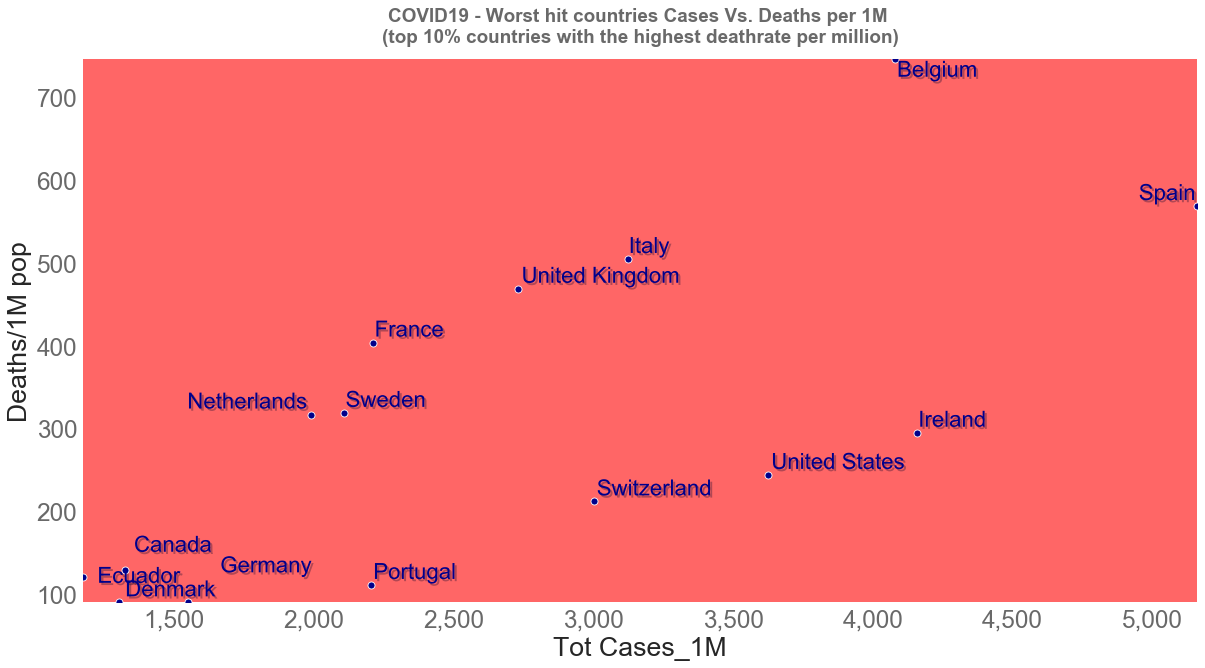

In [106]:
worst_countries()

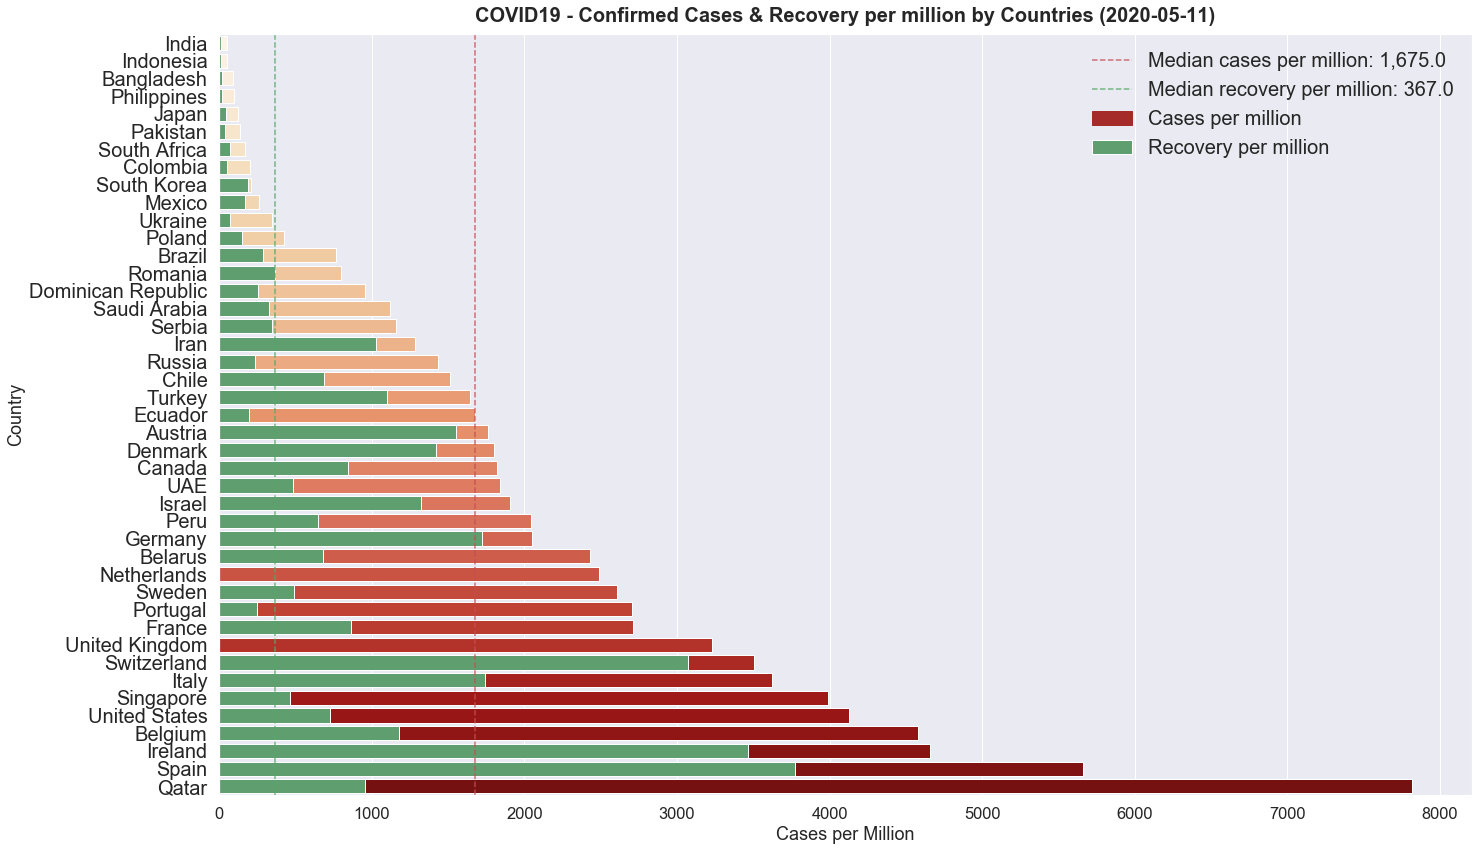

In [107]:
countries_cases_recovery()

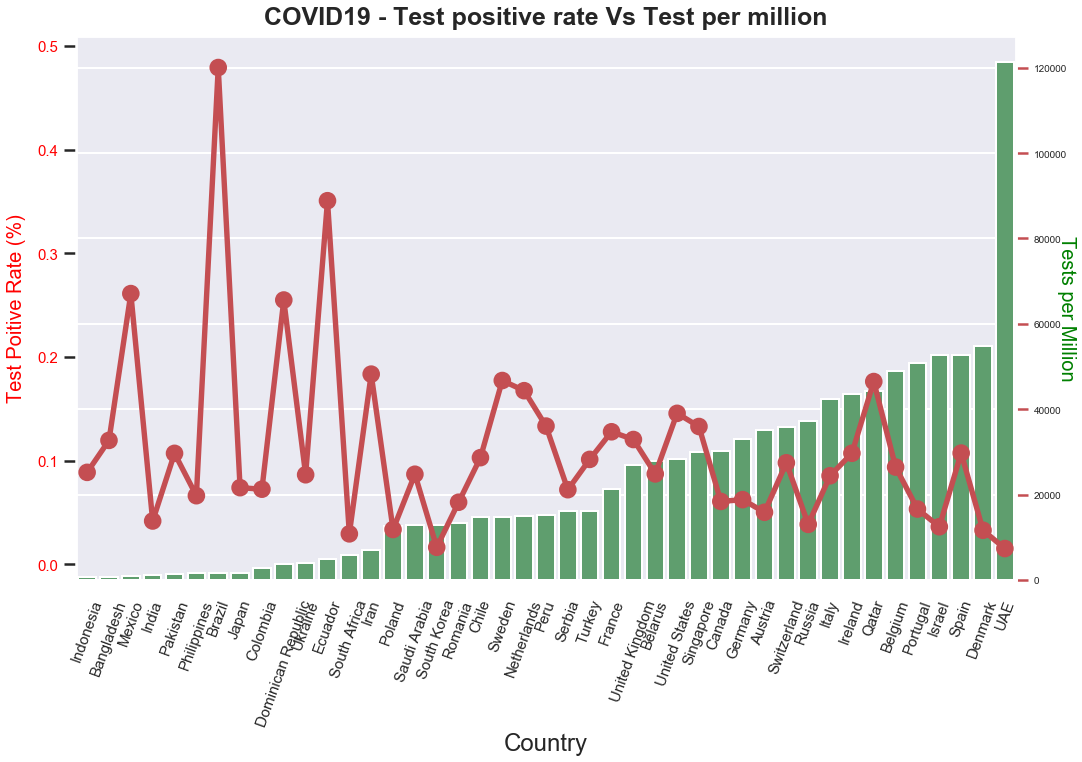

In [108]:
countries_tpr_tr()

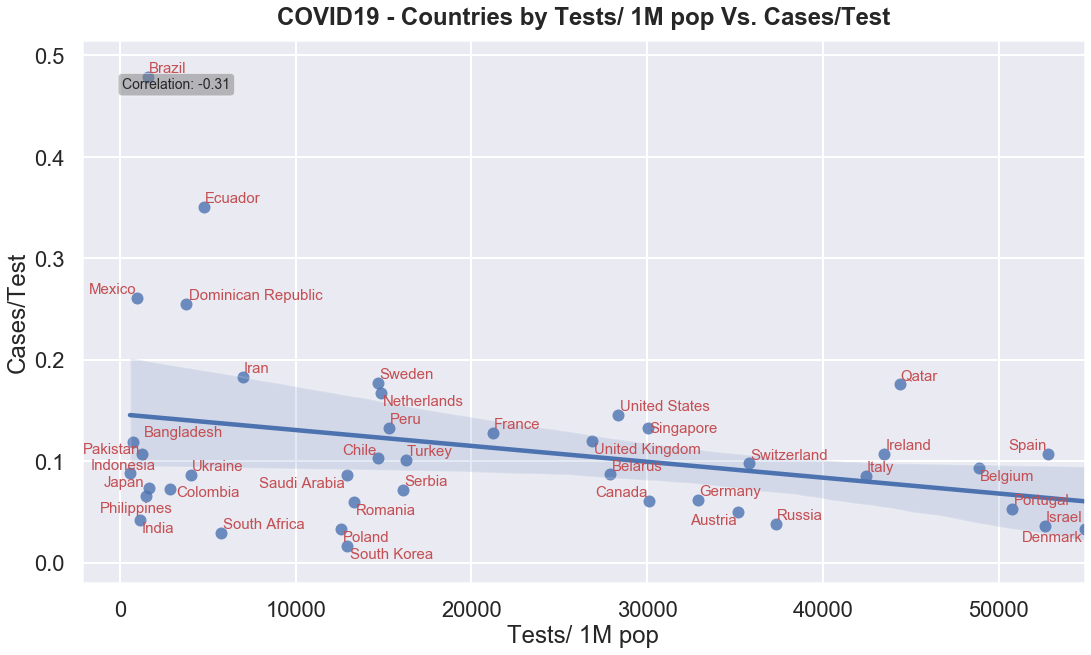

In [109]:
pair_corr_plot(df[df.index !='UAE'],x='Tests/ 1M pop',y='Cases/Test')

In [110]:
df_ir = df[(df['Tests/ 1M pop'] > 5000) & (df['TotalCases']>5000)].reset_index()
df_ir['recoverd\cases'] = df_ir['TotalRecovered'] / (df_ir['TotalCases'] - df_ir['TotalDeaths'])
df_ir['Cases_tests_recoverd_retio'] = df_ir['recoverd\cases'] * df_ir['Cases/Test']
df_ir = df_ir.sort_values(by='Cases/Test')
# df_ir[['Country','Population (2020)','Tests/ 1M pop','Cases/Test']].sort_values(by='Tests/ 1M pop')

In [111]:
df_ir[['Country','Population (2020)','Tests/ 1M pop','Cases/Test']].corr()

Population (2020)  Tests/ 1M pop  Cases/Test
Population (2020)           1.000000      -0.126936    0.155910
Tests/ 1M pop              -0.126936       1.000000   -0.273386
Cases/Test                  0.155910      -0.273386    1.000000

In [112]:
df = df[df['TotalCases'] >1000]

In [113]:
# Correlations
df.corr()

TotalCases  NewCases  TotalDeaths  TotalRecovered  \
TotalCases           1.000000  0.867212     0.934827        0.821730   
NewCases             0.867212  1.000000     0.731597        0.633972   
TotalDeaths          0.934827  0.731597     1.000000        0.801731   
TotalRecovered       0.821730  0.633972     0.801731        1.000000   
ActiveCases          0.979674  0.883395     0.892903        0.692192   
Serious              0.924344  0.867385     0.843962        0.751741   
Tot Cases_1M         0.308603  0.206460     0.373128        0.365937   
Deaths/1M pop        0.352968  0.169282     0.570096        0.446483   
TotalTests           0.911917  0.883114     0.825285        0.798451   
Tests/ 1M pop        0.066624  0.022006     0.083207        0.106748   
Population (2020)    0.245121  0.395001     0.193381        0.208351   
Density (P/Km²)     -0.041021 -0.033506    -0.048758       -0.062259   
Fert. Rate          -0.123597 -0.099297    -0.146537       -0.182802   
MedAg                0.135338  0.046763     0.189853        0.211862   
Urban Pop %          0.158544  0.116109     0.188734        0.193738   
Cases/Test           0.074309  0.121754     0.090740        0.075060   
Deaths/Cases         0.217063  0.075292     0.432173        0.268762   
Recovered/Cases     -0.116029 -0.209177    -0.128773        0.105921   
World%TotalCases     1.000000  0.867236     0.934864        0.821756   

                   ActiveCases   Serious  Tot Cases_1M  Deaths/1M pop  \
TotalCases            0.979674  0.924344      0.308603       0.352968   
NewCases              0.883395  0.867385      0.206460       0.169282   
TotalDeaths           0.892903  0.843962      0.373128       0.570096   
TotalRecovered        0.692192  0.751741      0.365937       0.446483   
ActiveCases           1.000000  0.910057      0.256564       0.270837   
Serious               0.910057  1.000000      0.221282       0.251185   
Tot Cases_1M          0.256564  0.221282      1.000000       0.594399   
Deaths/1M pop         0.270837  0.251185      0.594399       1.000000   
TotalTests            0.879262  0.789559      0.291017       0.336421   
Tests/ 1M pop         0.045776  0.005237      0.625313       0.235641   
Population (2020)     0.241073  0.224102     -0.119128      -0.032130   
Density (P/Km²)      -0.029586 -0.054680      0.121303      -0.058120   
Fert. Rate           -0.090760 -0.111333     -0.316043      -0.252472   
MedAg                 0.092727  0.092777      0.316925       0.362199   
Urban Pop %           0.130112  0.182354      0.305951       0.299404   
Cases/Test            0.066100  0.191745      0.043279       0.062948   
Deaths/Cases          0.161011  0.191971      0.197012       0.757403   
Recovered/Cases      -0.179788 -0.103451      0.034912      -0.069934   
World%TotalCases      0.979661  0.924369      0.308520       0.353010   

                   TotalTests  Tests/ 1M pop  Population (2020)  \
TotalCases           0.911917       0.066624           0.245121   
NewCases             0.883114       0.022006           0.395001   
TotalDeaths          0.825285       0.083207           0.193381   
TotalRecovered       0.798451       0.106748           0.208351   
ActiveCases          0.879262       0.045776           0.241073   
Serious              0.789559       0.005237           0.224102   
Tot Cases_1M         0.291017       0.625313          -0.119128   
Deaths/1M pop        0.336421       0.235641          -0.032130   
TotalTests           1.000000       0.152176           0.301191   
Tests/ 1M pop        0.152176       1.000000          -0.167999   
Population (2020)    0.301191      -0.167999           1.000000   
Density (P/Km²)     -0.047452       0.087060          -0.014531   
Fert. Rate          -0.179718      -0.351853           0.043939   
MedAg                0.205352       0.361994          -0.140266   
Urban Pop %          0.164977       0.311565          -0.149260   
Cases/Test          -0.046970      -0.274670 

Number of countries: 93


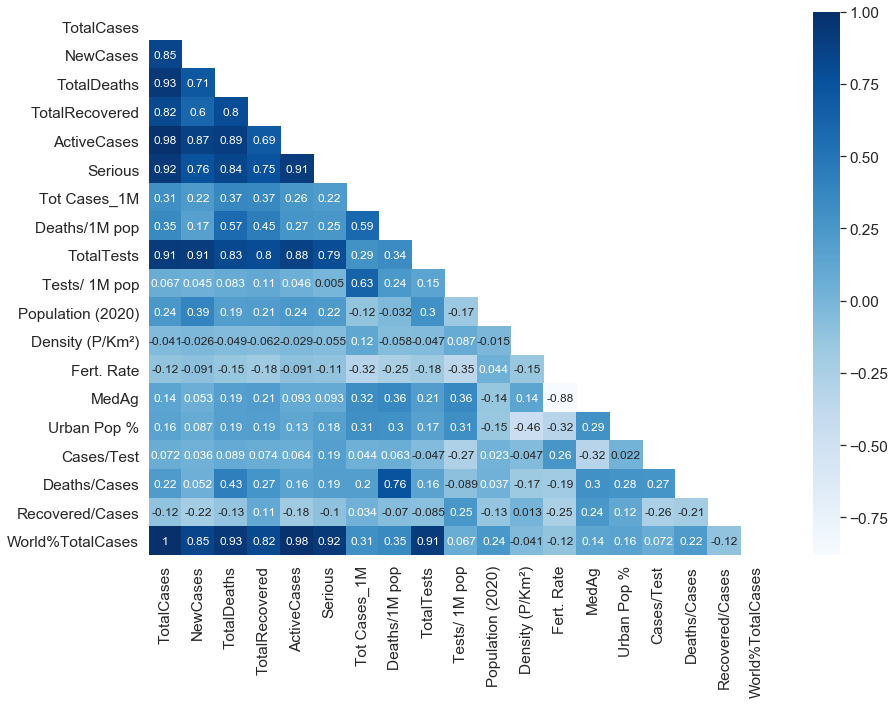

In [35]:
# In order to try to find correlations that could be more statistically valid,
# I have filled in total cases to more than 10,000.

print(f"Number of countries: {len(df)}")
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr, mask=mask, cmap='Blues', annot=True,annot_kws={"size":12})
    sns.set(font_scale=1.5);


In [114]:
# Explore the mwdian age correlation, with counries that has more than 1,000 deaths.
df_cor_age = df[df['TotalDeaths']>1000][['Deaths/Cases', 'MedAg']].sort_values('MedAg', ascending=False)
df_cor_age = df_cor_age[df_cor_age['MedAg'] > 10]
print(df_cor_age.corr())
df_cor_age.reset_index()

              Deaths/Cases    MedAg
Deaths/Cases       1.00000  0.37192
MedAg              0.37192  1.00000


Country  Deaths/Cases  MedAg
0            Italy      0.139499     47
1          Germany      0.044010     46
2         Portugal      0.041152     46
3            Spain      0.100585     45
4      Switzerland      0.060485     43
5      Netherlands      0.127619     43
6          Belgium      0.163072     42
7           France      0.149065     42
8           Canada      0.070736     41
9           Sweden      0.122521     41
10  United Kingdom      0.145335     40
11          Russia      0.009133     40
12   United States      0.059119     38
13         Ireland      0.063402     38
14          Brazil      0.068366     33
15            Iran      0.061708     32
16          Turkey      0.027305     32
17            Peru      0.028065     31
18          Mexico      0.100209     29
19           India      0.032936     28
20         Ecuador      0.071958     28

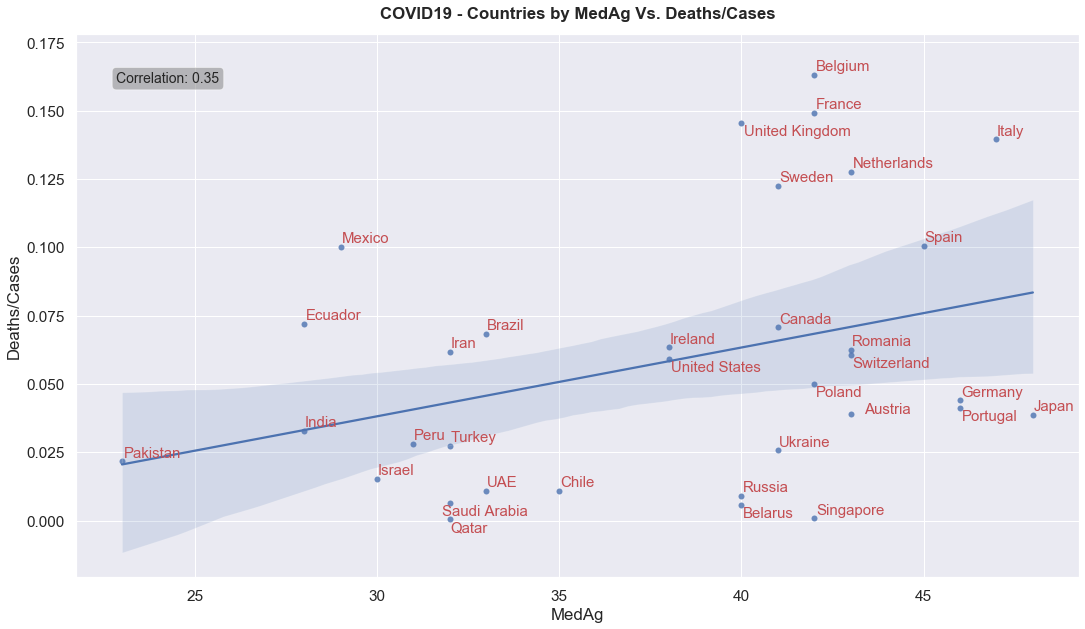

In [115]:
pair_corr_plot(df, tc_threshold=15000)

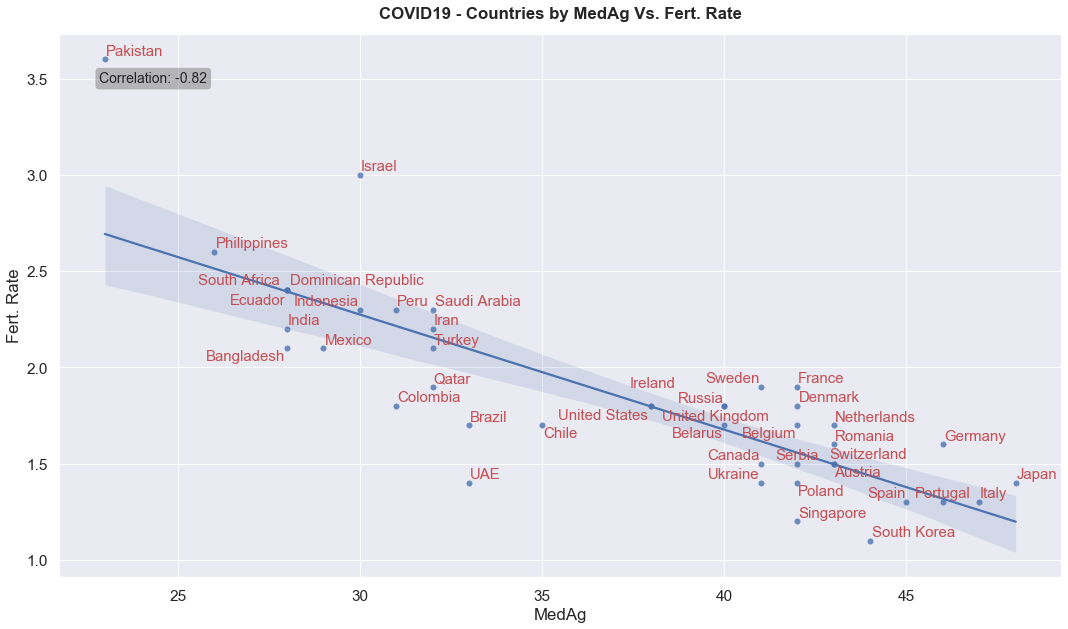

In [116]:
pair_corr_plot(df,y='Fert. Rate', x='MedAg')

In [117]:
df[df['TotalCases']>10000].corr()

TotalCases  NewCases  TotalDeaths  TotalRecovered  \
TotalCases           1.000000  0.854876     0.928568        0.803611   
NewCases             0.854876  1.000000     0.702326        0.582773   
TotalDeaths          0.928568  0.702326     1.000000        0.778326   
TotalRecovered       0.803611  0.582773     0.778326        1.000000   
ActiveCases          0.980030  0.879490     0.887319        0.670860   
Serious              0.918477  0.858028     0.831063        0.730156   
Tot Cases_1M         0.293362  0.127912     0.381396        0.338115   
Deaths/1M pop        0.274391  0.046988     0.519707        0.352993   
TotalTests           0.907044  0.873157     0.808590        0.770362   
Tests/ 1M pop        0.082879 -0.000724     0.114579        0.142417   
Population (2020)    0.188408  0.346734     0.128173        0.128660   
Density (P/Km²)     -0.074614 -0.066417    -0.086839       -0.113875   
Fert. Rate          -0.073317  0.024143    -0.131747       -0.150265   
MedAg                0.113682 -0.062463     0.211498        0.214935   
Urban Pop %          0.140166  0.082027     0.184211        0.159268   
Cases/Test           0.105867  0.189413     0.133706        0.100882   
Deaths/Cases         0.162640 -0.034685     0.432294        0.202487   
Recovered/Cases     -0.094713 -0.220673    -0.110687        0.276067   
World%TotalCases     1.000000  0.854912     0.928609        0.803654   

                   ActiveCases   Serious  Tot Cases_1M  Deaths/1M pop  \
TotalCases            0.980030  0.918477      0.293362       0.274391   
NewCases              0.879490  0.858028      0.127912       0.046988   
TotalDeaths           0.887319  0.831063      0.381396       0.519707   
TotalRecovered        0.670860  0.730156      0.338115       0.352993   
ActiveCases           1.000000  0.904657      0.244802       0.202503   
Serious               0.904657  1.000000      0.180612       0.167740   
Tot Cases_1M          0.244802  0.180612      1.000000       0.595825   
Deaths/1M pop         0.202503  0.167740      0.595825       1.000000   
TotalTests            0.878617  0.774605      0.253618       0.238603   
Tests/ 1M pop         0.053491 -0.021665      0.555847       0.308695   
Population (2020)     0.196164  0.171822     -0.255874      -0.141287   
Density (P/Km²)      -0.054220 -0.091146      0.163674      -0.100342   
Fert. Rate           -0.036773 -0.054727     -0.291983      -0.241625   
MedAg                 0.062153  0.040372      0.355405       0.438323   
Urban Pop %           0.117479  0.192141      0.235493       0.305889   
Cases/Test            0.095480  0.350170      0.079647       0.069434   
Deaths/Cases          0.111009  0.138505      0.261574       0.842201   
Recovered/Cases      -0.203908 -0.082661     -0.028242      -0.021563   
World%TotalCases      0.980012  0.918504      0.293368       0.274472   

                   TotalTests  Tests/ 1M pop  Population (2020)  \
TotalCases           0.907044       0.082879           0.188408   
NewCases             0.873157      -0.000724           0.346734   
TotalDeaths          0.808590       0.114579           0.128173   
TotalRecovered       0.770362       0.142417           0.128660   
ActiveCases          0.878617       0.053491           0.196164   
Serious              0.774605      -0.021665           0.171822   
Tot Cases_1M         0.253618       0.555847          -0.255874   
Deaths/1M pop        0.238603       0.308695          -0.141287   
TotalTests           1.000000       0.212088           0.241091   
Tests/ 1M pop        0.212088       1.000000          -0.265487   
Population (2020)    0.241091      -0.265487           1.000000   
Density (P/Km²)     -0.095986       0.023399          -0.025667   
Fert. Rate          -0.127121      -0.342333           0.206650   
MedAg                0.190268       0.337597          -0.296069   
Urban Pop %          0.115658       0.255656          -0.323264   
Cases/Test          -0.098870      -0.340484 

In [118]:
df[df['TotalCases'] > 50000][['Population (2020)','MedAg']].corr()

Population (2020)     MedAg
Population (2020)           1.000000 -0.521816
MedAg                      -0.521816  1.000000

In [119]:
# Cheak death rate at top and bottom quantiles (deaths/total cases)
df_topQ_Age = df[df['MedAg'] > df['MedAg'].quantile(0.8)]
df_bottomQ_Age = df[df['MedAg'] < df['MedAg'].quantile(0.2)]

death_rate_top10q_med_age = df_topQ_Age['TotalDeaths'].sum()/df_topQ_Age['TotalCases'].sum() 
death_rate_bottom10q_med_age = df_bottomQ_Age['TotalDeaths'].sum()/df_bottomQ_Age['TotalCases'].sum() 

print(f"Death rate Top 20% median age countries: {round(death_rate_top10q_med_age *100,1)}%")
print(f"Death rate Bottom 20% median age countries: {round(death_rate_bottom10q_med_age *100,1)}%")

Death rate Top 20% median age countries: 9.3%
Death rate Bottom 20% median age countries: 3.3%


In [124]:
pd.set_option('display.max_rows', 500)
df_oecd = df[df.index.isin(oecd_countries)]
df_oecd['% Deaths'] = (df_oecd['TotalDeaths'] / df_oecd['TotalCases']).round(3)
df_oecd['% Recovered'] = (df_oecd['TotalRecovered'] / df_oecd['TotalCases']).round(3)
df_oecd['% Active'] = (df_oecd['ActiveCases'] / df_oecd['TotalCases']).round(3)
df_oecd[['TotalCases','TotalDeaths','ActiveCases','TotalRecovered','% Deaths', '% Active','% Recovered']].style\
.format({'TotalCases':'{:,.0f}', 'TotalDeaths':'{:,.0f}','ActiveCases':'{:,.0f}','TotalRecovered':'{:,.0f}',
         '% Deaths':'{:.01%}','% Active':'{:.01%}','% Recovered':'{:.01%}'})\
.background_gradient(cmap='Blues',subset=["TotalCases"])\
.background_gradient(cmap='Reds',subset=["TotalDeaths"])\
.background_gradient(cmap='OrRd',subset=["% Deaths"])\
.background_gradient(cmap='Greens',subset=["TotalRecovered"])\
.background_gradient(cmap='Greens',subset=["% Recovered"])\
.background_gradient(cmap='OrRd',subset=["ActiveCases"])\
.background_gradient(cmap='PuBu',subset=["% Active"])\
.set_caption('OECD countries')

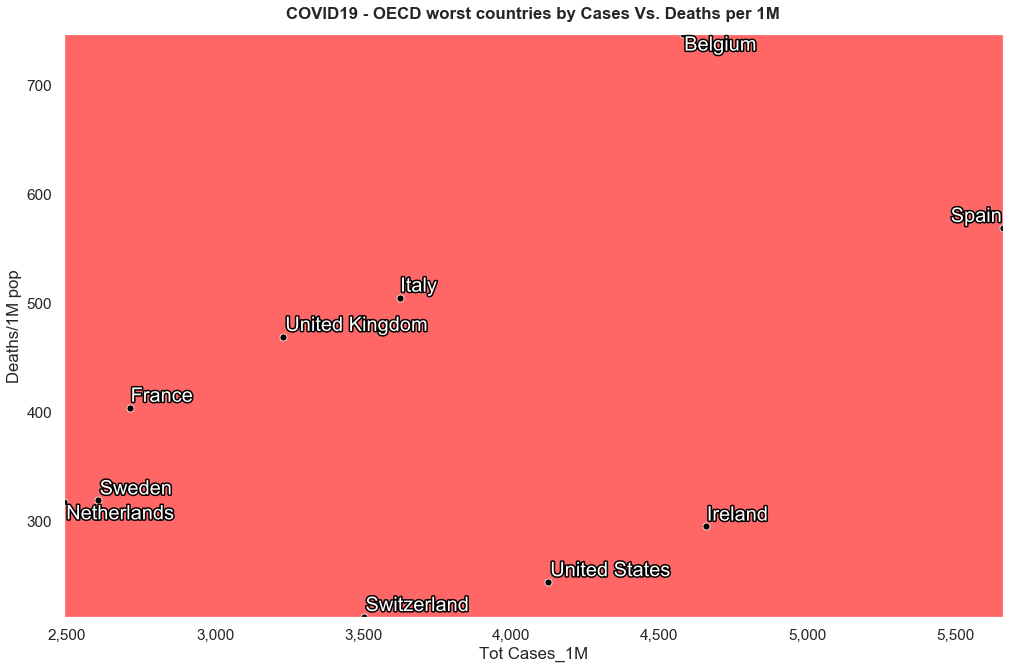

In [125]:
import matplotlib.patheffects as path_effects

plt.style.use('seaborn-deep')

df_oecd_chart = df[df.index.isin(oecd_countries)].reset_index()
median_ir = df_oecd_chart['Deaths/1M pop'].median()
df_oecd_chart = df_oecd_chart.sort_values('Deaths/1M pop', ascending=False).head(10)
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x='Tot Cases_1M', y='Deaths/1M pop', data=df_oecd_chart, s=50, color='black');
text = [plt.text(x, y, z, color='w', size=20,path_effects=[path_effects.Stroke(linewidth=3,
        foreground='black'), path_effects.Normal()]) for x, y, z in zip(df_oecd_chart['Tot Cases_1M'],
        df_oecd_chart['Deaths/1M pop'],df_oecd_chart['Country'])]
plt.title(f'COVID19 - OECD worst countries by Cases Vs. Deaths per 1M',pad=15,weight = 'semibold')
# ax.set(xlim=(0,0.35));
# plt.axvspan(0, median_ir, facecolor='g', alpha=0.5)
# plt.axvspan(median_ir, 0.35, facecolor='r', alpha=0.5)
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
plt.margins(x=0,y=0);plt.grid(b=None);
ax.patch.set_facecolor('red');ax.patch.set_alpha(0.6);
adjust_text(text);
path_effects=[path_effects.withSimplePatchShadow()]

In [126]:
df_oecd.reset_index(inplace=True)
fig = go.Figure(data=[
    go.Pie(labels=df_oecd['Country'], 
           values=df_oecd['TotalCases'], 
           hole=.45,
           textinfo='label+percent'
          )
])

fig.update_layout(
    height=700,
    width=700,
    title_text="Positive Cases Percentage - OECD Countries",
    annotations=[
        dict(text='Positive<br>Cases', showarrow=False),
    ]
)
fig.update_traces(textposition='inside')
fig.show()

In [127]:
print(f"** OECD countries accounts for "\
      f"{round(df_oecd['TotalCases'].sum()/df['TotalCases'].sum()*100,1)}% of cases worldwide.")

** OECD countries accounts for 74.7% of cases worldwide.


![US states](https://cdnuploads.aa.com.tr/uploads/Contents/2020/03/31/thumbs_b_c_f0c9e70408e03dcbd2c231d82228c08b.jpg?v=210121)


In [128]:
# US positive
us_p = usa_covid19.groupby('state')['positive'].first().sum()

# US test positive rate
us_pr =us_p /(usa_covid19.groupby('state')['totalTestResults'].first().sum())

# US recovered
us_r=usa_covid19.groupby('state')['recovered'].first().sum()

# US recovered percentage
us_rp = us_r / (usa_covid19.groupby('state')['positive'].first().sum())

# US deaths
us_d = usa_covid19.groupby('state')['death'].first().sum()

# US deaths percentage
us_dp = us_d / us_p

# US total tests
us_t = usa_covid19.groupby('state')['totalTestResults'].first().sum()



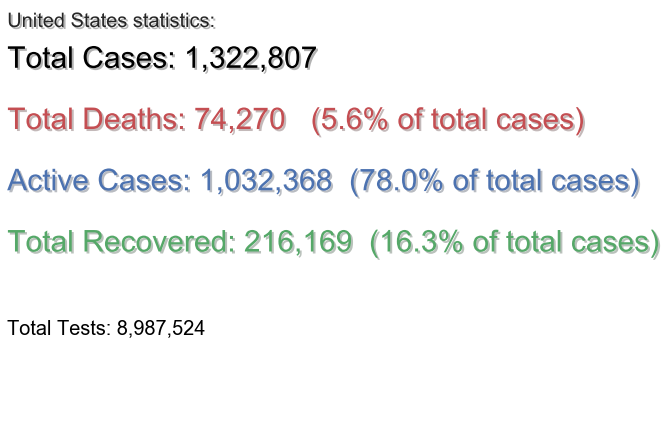

In [130]:
import matplotlib.patheffects as path_effects

fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(1,1,1)
# plt.imshow(im_usa, extent=[0.6,1,0.2,1], zorder=0, aspect='auto', alpha=0.7)
plt.text(0, 0.95,'United States statistics:', fontsize=20,path_effects=[path_effects.withSimplePatchShadow()])
plt.text(0, 0.85,f"Total Cases: {int(us_p):,}", color='black', fontsize=30,path_effects=[path_effects.withSimplePatchShadow()]);
plt.text(0, 0.7,f"Total Deaths: {int(us_d):,}   ({round(us_dp*100,1)}% of total cases)",color='r', fontsize=30,
        path_effects=[path_effects.withSimplePatchShadow()]);
plt.text(0, 0.55,f'Active Cases: {int(us_p-(us_r + us_d)):,}  ({round((us_p-(us_r + us_d))/us_p*100,1)}% of total cases)',
         color='b', fontsize=30,path_effects=[path_effects.withSimplePatchShadow()]);
plt.text(0, 0.4,f'Total Recovered: {int(us_r):,}  ({round(us_r/us_p*100,1)}% of total cases)',color='g', fontsize=30,
        path_effects=[path_effects.withSimplePatchShadow()]);
plt.text(0, 0.2,f'Total Tests: {int(us_t):,}',color='black', fontsize=20);
plt.axis('off');


In [131]:
# States symbols
usa_covid19['state'].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [132]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


In [133]:
# Converting US state names
usa_covid19['state'] = usa_covid19['state'].map(states)

In [134]:
# choropleth maps bind Pandas Data Frames and json geometries.
us_states_c = usa_covid19.groupby('state')[['positive']].first()
us_states_c= us_states_c.drop('American Samoa')
us_states_c['Confirmed_Log'] = np.log2(us_states_c['positive'])

states_geo = 'us-states1.json'
us_map = folium.Map(location=[39, -95], zoom_start=4)
folium.Choropleth(geo_data=states_geo, data=us_states_c,
             columns=[us_states_c.index, 'Confirmed_Log'],
             key_on='feature.properties.name',
             fill_color='OrRd',nan_fill_color='white', fill_opacity=0.6, line_opacity=0.3,
             highlight=True,bins=6, legend_name='US tates - Covid19 - log Cases').add_to(us_map)
 
us_map

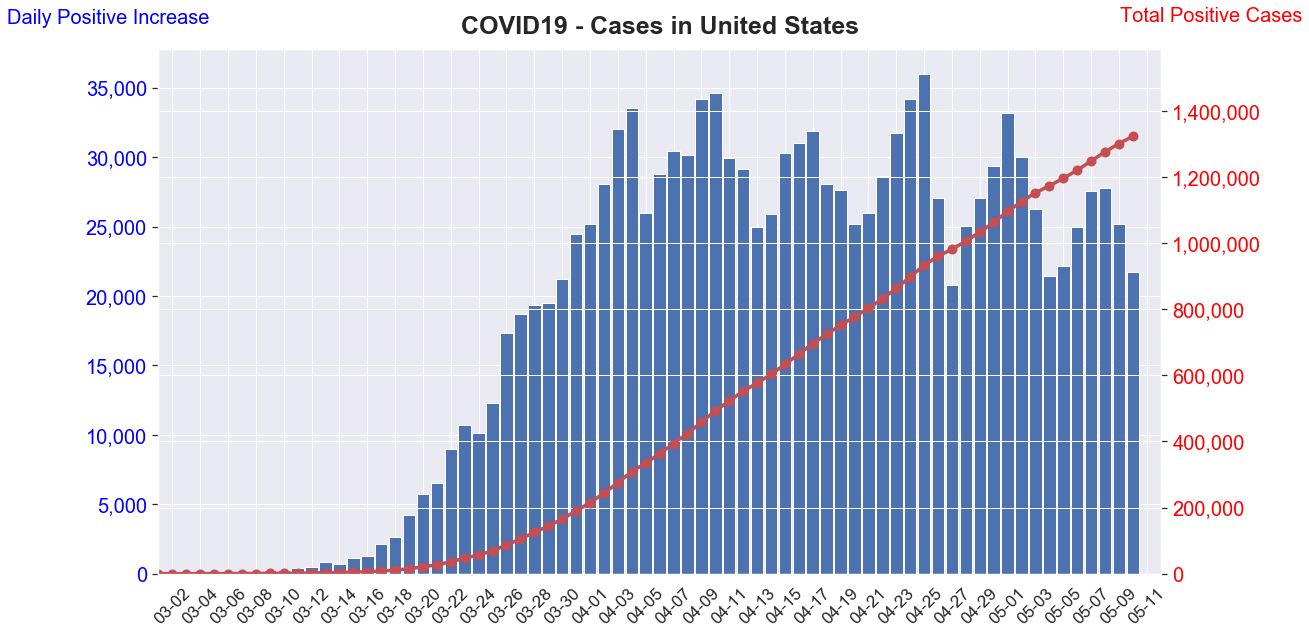

In [135]:
usa_positive = usa_covid19.groupby('date')[['positive','positiveIncrease']].sum()
usa_positive = usa_positive[usa_positive.index >= '2020-03-01'].reset_index()
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(16,9))
plt.bar(usa_positive['date'], height=usa_positive['positiveIncrease'], width=0.9);
plt.xticks(fontsize=17,rotation=45);
plt.yticks(color='blue', size=20)
plt.xlim(usa_positive['date'].min().date(),usa_positive['date'].max().date()++ datetime.timedelta(2))
plt.title('COVID19 - Cases in United States', fontsize=25,pad=15,weight ='semibold')
ax.set_ylabel('Daily Positive Increase', fontsize=16, color='blue', size=20,rotation=360)
ax.yaxis.set_label_coords(-0.05,1.04)

ax2 = ax.twinx()
plt.plot(usa_positive['date'],usa_positive['positive'], lw=3.5, color='r', marker='.', markersize=20 )
plt.yticks(color='red', size=20)
plt.ylim(0,(usa_positive['positive'].max()*1.2))
ax2.set_ylabel('Total Positive Cases', fontsize=16, color='red', size=20, rotation=360, labelpad=35)
ax2.yaxis.set_label_coords(+1.05,1.08)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))


In [136]:
usa_worst_s = usa_covid19.groupby('state').first()[['positive']].sort_values(by='positive',ascending=False)
usa_worst_s['Label'] = usa_worst_s.index + "\n" + usa_worst_s['positive']\
.apply(lambda x : "{:,}".format(x))

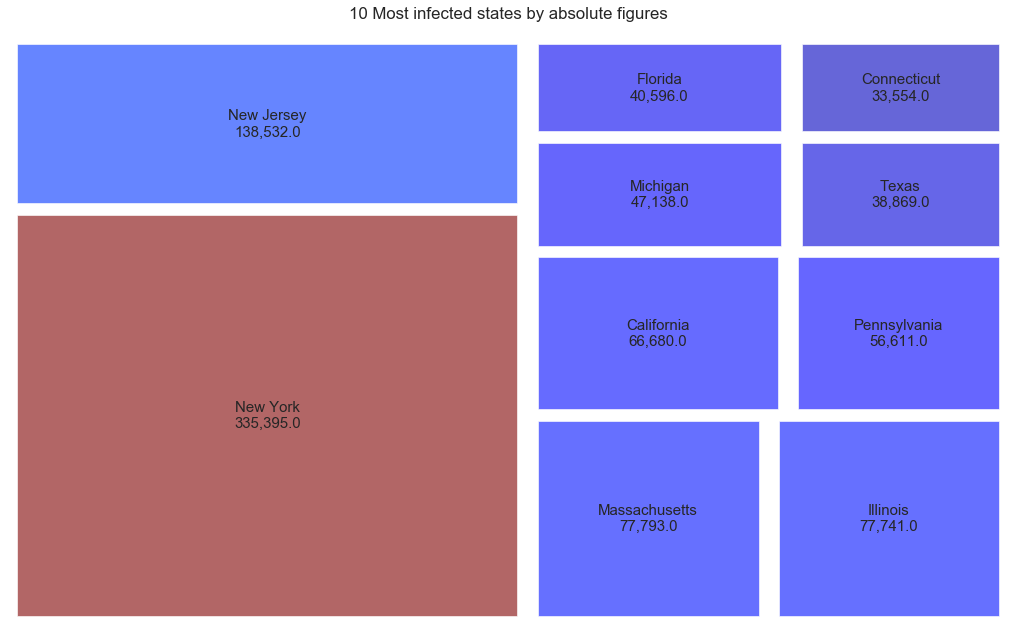

In [137]:
usa_worst_s = usa_covid19.groupby('state').first()[['positive']].sort_values(by='positive',ascending=False).head(10)
usa_worst_s['Label'] = usa_worst_s.index + "\n" + usa_worst_s['positive']\
.apply(lambda x : "{:,}".format(x))
usa_worst_s = usa_worst_s[usa_worst_s['positive'] > 0]
plt.figure(figsize=(16,10))
plt.axis('off')
mini = min(worst_countries_cases['TotalCases'])
maxi = max(worst_countries_cases['TotalCases'])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
cmap = matplotlib.cm.jet
colors = [cmap(norm(value)) for value in worst_countries_cases['TotalCases']]
squarify.plot(usa_worst_s['positive'], label=usa_worst_s['Label'],color=colors, alpha=0.6, pad=True,
              text_kwargs={'fontsize':15});
plt.title('10 Most infected states by absolute figures', pad=20);


In [138]:
usa_t5 = pd.DataFrame(usa_covid19[usa_covid19['date'] > '2020-03-01'].pivot_table(index='date',values='positive',
          columns=['state'])[-1:].T).nlargest(5,usa_covid19.date[1])
# usa_t10.index = usa_t10.index.map(states)
usa_t5.columns=['TotalCases']
usa_t5

TotalCases
state                    
New York         335395.0
New Jersey       138532.0
Massachusetts     77793.0
Illinois          77741.0
California        66680.0

In [139]:
us_t3 = pd.DataFrame(usa_covid19[usa_covid19['date'] > '2020-03-01'].pivot_table(index='date',values='positive',
          columns=['state'])[-1:].T).nlargest(3,usa_covid19.date[1])
us_t3.columns=['TotalCases']


In [140]:
plt.style.use('default')


In [141]:
test = usa_covid19[(usa_covid19['date'] > '2020-03-01') & (usa_covid19['state'].isin(usa_t5.index.tolist()))].pivot_table\
            (index='date',values='positive', columns='state')

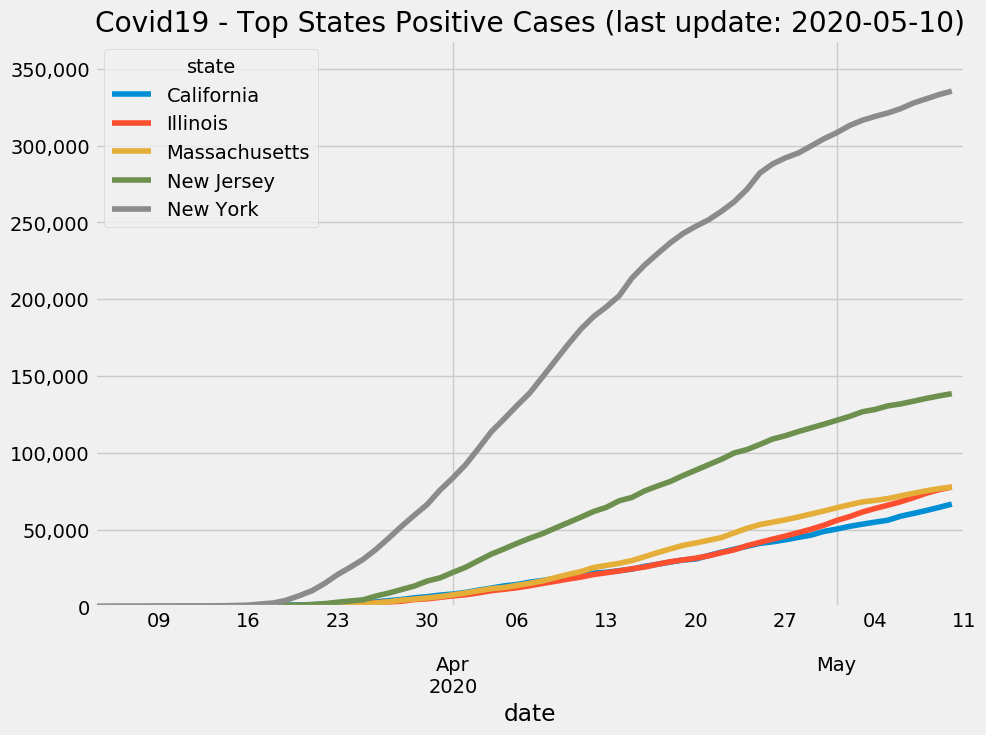

In [142]:
plt.style.use('fivethirtyeight')

usa_tspc = usa_covid19[(usa_covid19['date'] > '2020-02-01') & (usa_covid19['state'].isin(usa_t5.index.tolist()))].pivot_table\
           (index='date',values='positive', columns='state')
ax=usa_tspc.plot(figsize=(10,7))
plt.title(f'Covid19 - Top States Positive Cases (last update: {usa_covid19.date[0].date()})');
plt.xlim(usa_tspc.index.min(), usa_tspc.index.max() + datetime.timedelta(1))
plt.ylim(0,usa_tspc.max().max()*1.1)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 


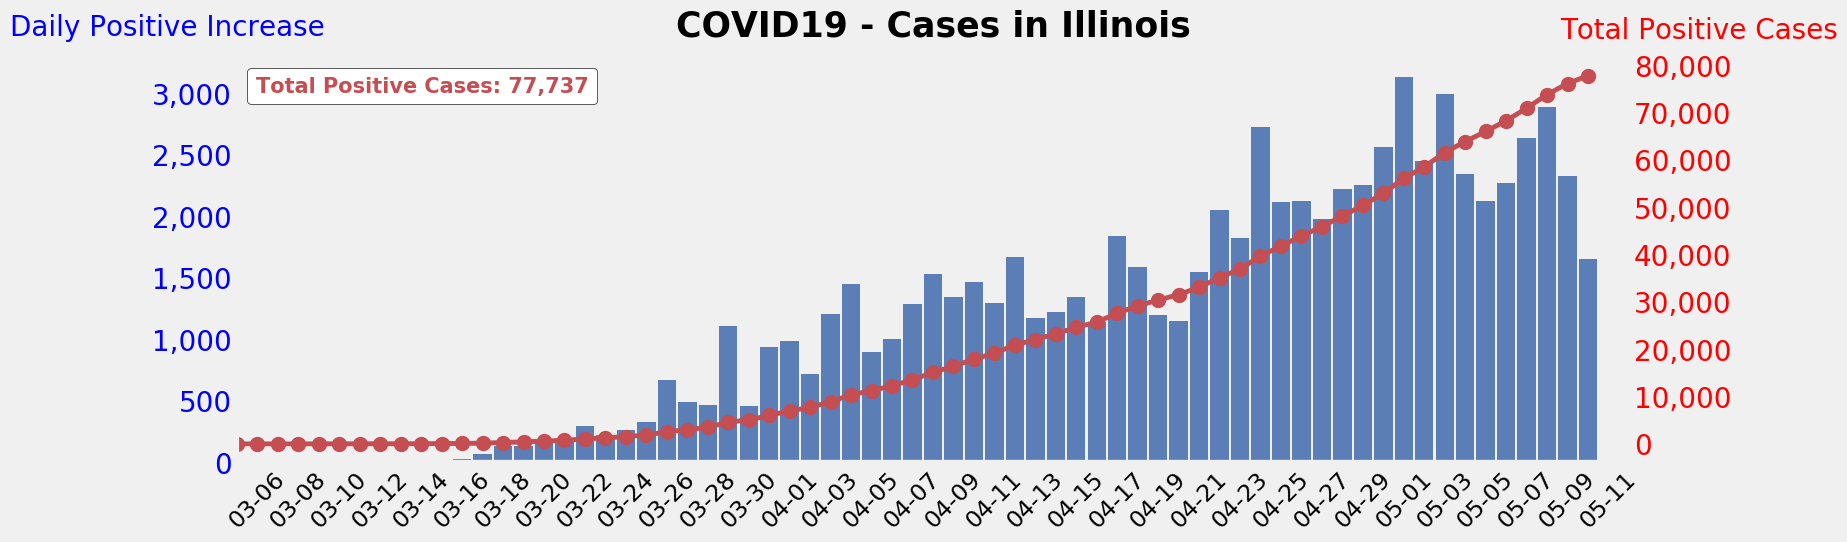

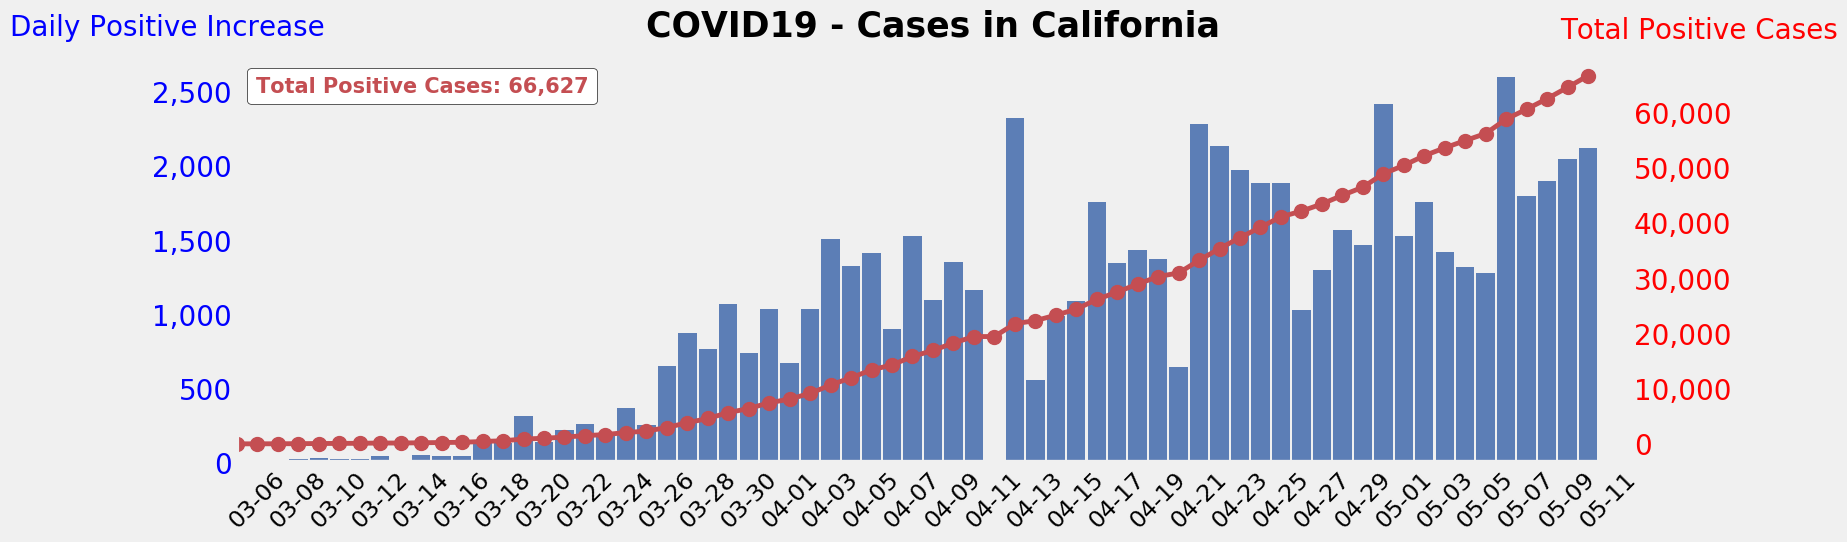

In [143]:
for state in usa_t5.index:
    
    positive_cases_plot(usa_covid19,state)

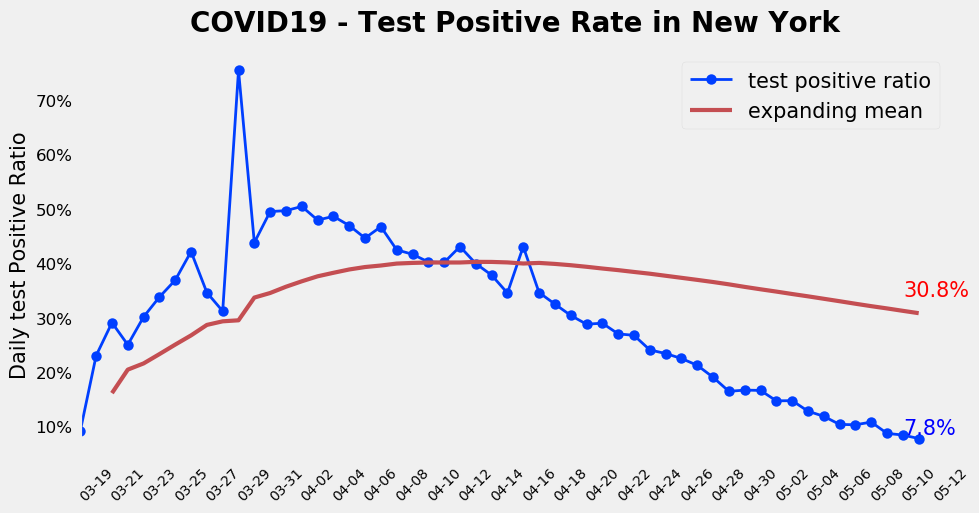

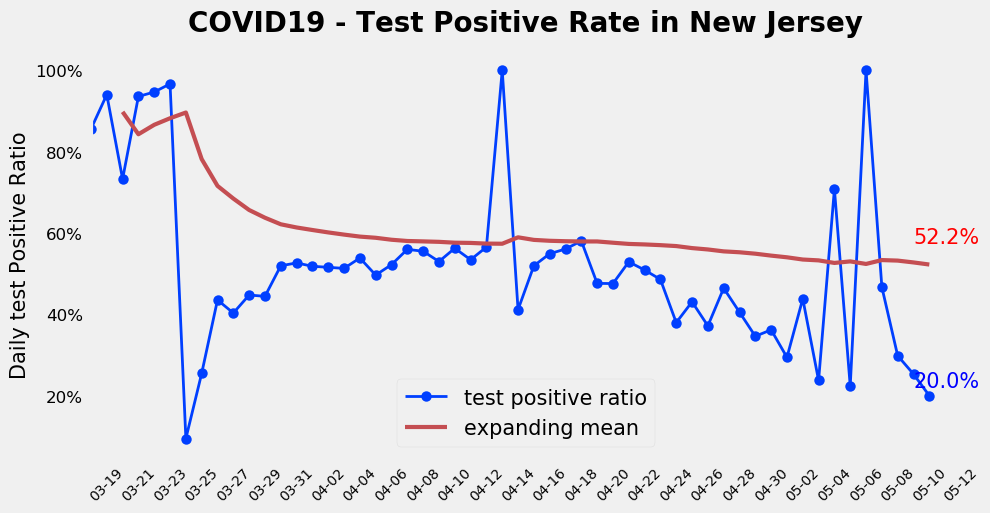

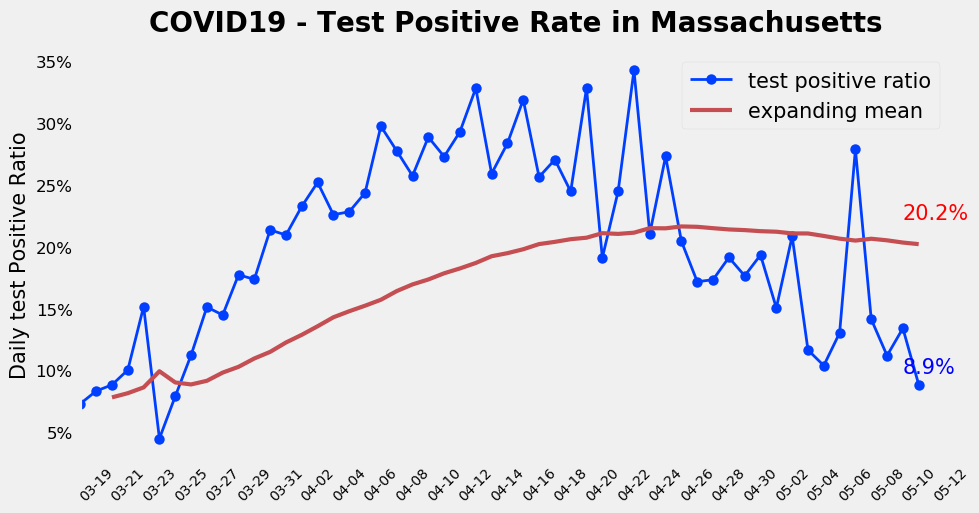

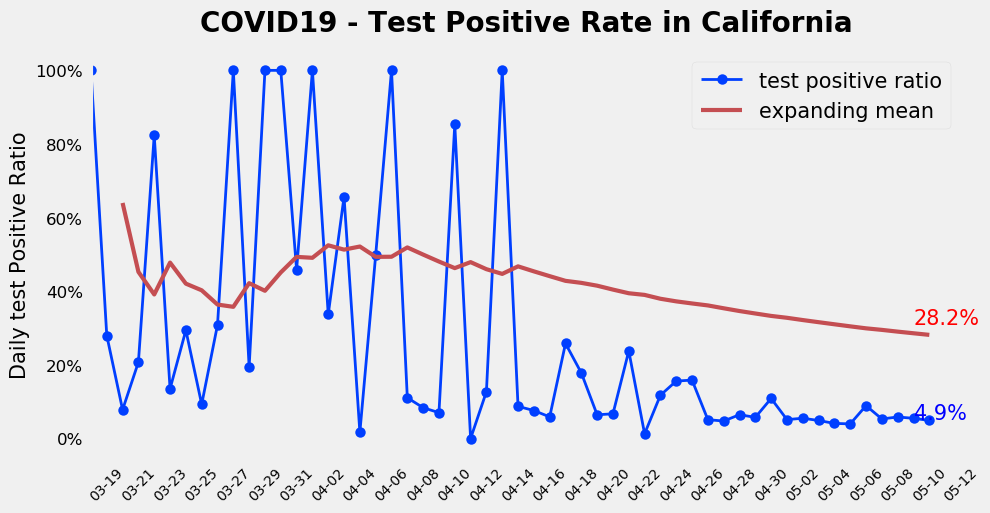

In [144]:
for state in usa_t5.index:
    
    test_positive_rate_plot(usa_covid19,state)

In [145]:
def positive_cases_plot(df,state):
    
    state_c = df[df['state'] ==state][['date','positiveIncrease','deathIncrease']].sort_values(by='date')\
    .reset_index(drop=True).dropna()
    state_c['total_cases'] = state_c['positiveIncrease'].cumsum()
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize=(16,5))
    plt.bar(state_c['date'], height=state_c['positiveIncrease'], width=0.9);
    plt.xlim(state_c['date'].min().date(),state_c['date'].max().date() + datetime.timedelta(2))
    plt.xticks(fontsize=17,rotation=45);
    plt.yticks(color='blue', size=20)
    plt.margins(x=0.04)
    plt.title(f'COVID19 - Cases in {state}', fontsize=20,pad=12,weight ='semibold')
    ax.set_ylabel('Positive Increase', fontsize=16, color='blue', size=25)

    ax2 = ax.twinx()
    plt.plot(state_c['date'],state_c['total_cases'], lw=3.5, color='r', marker='.', markersize=20)
    plt.yticks(color='red', size=20)
    plt.ylim(0,(state_c['total_cases'].max()*1.2))
    ax2.set_ylabel('Total Positive Cases', fontsize=16, color='red', size=25, rotation=270, labelpad=35)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

In [146]:
usa_covid19lw = usa_covid19[usa_covid19['date'] < (usa_covid19.date.max()-datetime.timedelta(6))]

In [147]:
usa_top20 = usa_covid19.groupby('state')[['positive']].first().sort_values(by='positive').reset_index()[-20:]

In [148]:
usa_top20

state  positive
36  North Carolina   14764.0
37       Tennessee   14985.0
38      Washington   16674.0
39        Colorado   19375.0
40        Virginia   24081.0
41            Ohio   24081.0
42         Indiana   24126.0
43       Louisiana   31600.0
44        Maryland   32587.0
45         Georgia   33441.0
46     Connecticut   33554.0
47           Texas   38869.0
48         Florida   40596.0
49        Michigan   47138.0
50    Pennsylvania   56611.0
51      California   66680.0
52        Illinois   77741.0
53   Massachusetts   77793.0
54      New Jersey  138532.0
55        New York  335395.0

In [149]:
top_20_infected()

<b>And, Let's see the states with the highest rate of change for the last 7 days:</b>

In [150]:
usa_w_roc = usa_covid19.groupby('state')[['positive']].first()
usa_w_roc['weekly change'] = usa_covid19.groupby('state')[['positive']].first() - usa_covid19lw.groupby('state')\
[['positive']].first()
usa_w_roc['% change']  = (usa_covid19.groupby('state')[['positive']].first() / usa_covid19lw.groupby('state')[['positive']]\
                          .first()-1)
usa_w_roc = usa_w_roc.sort_values(by='% change', ascending=False).head(10)
usa_w_roc.style.format({'positive':'{:,.0f}', 'weekly change':'{:,.0f}','% change':'{:.01%}'}).background_gradient(cmap='Blues')

In [151]:
top_us_states_df = usa_covid19[usa_covid19['state'].isin(usa_t5.index.tolist())].copy()

# total deaths to positive cases in each top state
sns.lmplot(x='positive', y='death', col='state', hue='state', col_wrap=3,
           data=top_us_states_df,sharex=False,sharey=False);

![US states](https://assets.weforum.org/article/image/large_kPbdJNerlCdAz-8fizqPQGg3sSSKfnSyJSrstSJTpfY.jpg)    